In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/CellType_Psy/src')
from CellType_PSY import *
import scanpy as sc
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol = LoadGeneINFO()

/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [6]:
def getBiasesBySTR(STR, dfs):
    biases = []
    for df in dfs:
        bias = df.loc[STR, "EFFECT"]
        biases.append(bias)
    biases = np.array(biases)
    return biases

def AddPvalue(ASD_Bias, SibBiasDFs):
    for CT, row in ASD_Bias.iterrows():
        mat_bias = getBiasesBySTR(CT, SibBiasDFs)
        Z, P = GetPermutationP(mat_bias, row["EFFECT"])
        ASD_Bias.loc[CT, "EFFECT2"] = row["EFFECT"] - np.mean(mat_bias)
        ASD_Bias.loc[CT, "Pvalue"] = P
        ASD_Bias.loc[CT, "Z_Match"] = Z
        ASD_Bias.loc[CT, "Z_Pvalue"] = scipy.stats.norm.sf(abs(Z))
    
    acc, qvalues = stats.multitest.fdrcorrection(ASD_Bias["Pvalue"].values, alpha=0.1,
                                                       method="i")
    print(sum(acc))
    ASD_Bias["qvalues"] = qvalues
    #ASD_Bias.to_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.subsib.FDR.csv")

    acc, qvalues = stats.multitest.fdrcorrection(ASD_Bias["Z_Pvalue"].values, alpha=0.1,
                                                   method="i")
    print(sum(acc))
    ASD_Bias["qvalues_ZP"] = qvalues
    return ASD_Bias

def LoadCTRLBiasDFs(CTRL_DIR, n_samples=10000):
    CTRLBiasDFs = []
    for i in range(n_samples):
        try:
            DF = pd.read_csv("{}/cont.bias.{}.csv".format(CTRL_DIR, i), index_col=0)
            CTRLBiasDFs.append(DF)
        except:
            continue
    print(len(CTRLBiasDFs))
    return CTRLBiasDFs

# Bias to SubSib

In [15]:
ASD_BiasDN = pd.read_csv("dat/Bias/ASD.ClusterV3.top60.DN.UMI.Z2.csv", index_col=0)
ASD_Bias = pd.read_csv("dat/Bias/ASD.ClusterV3.top60.UMI.Z2.csv", index_col=0)
ASD_ClusterV3_Bias160DN = pd.read_csv("dat/Bias/ASD.ClusterV3.top160.DN.UMI.Z2.csv", index_col=0)

In [16]:
SubSibDIR = "/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/CTRL/SubSampleSib_w_GeneProb/Cluster_V3_UMI_Z2_DN_V2_zclip3/"
SibBiasDFs_z1clip3 = LoadCTRLBiasDFs(SubSibDIR)

9624


In [19]:
ASD_BiasDN_z1clip3 = pd.read_csv("dat/Bias/ASD.ClusterV3.top60.UMI.Z2.z1clip3.csv", index_col=0)
ASD_BiasDN_z1clip3_addP = AddPvalue(ASD_BiasDN_z1clip3, SibBiasDFs_z1clip3)
ASD_BiasDN_z1clip3_addP.to_csv("dat/Bias/ASD.ClusterV3.top60.UMI.Z2.z1clip3.addP.csv")

327
1212


In [20]:
print(len(ASD_BiasDN_z1clip3_addP[ASD_BiasDN_z1clip3_addP["qvalues"]<0.05]))
print(len(ASD_BiasDN_z1clip3_addP[ASD_BiasDN_z1clip3_addP["qvalues"]<0.1]))

178
327


In [13]:
SubSibDIR = "/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/CTRL/SubSampleSib_w_GeneProb/Cluster_V3_UMI_Z2/"
SibBiasDFs = []
for i in range(10000):
    try:
        DF = pd.read_csv("{}/cont.bias.{}.csv".format(SubSibDIR, i), index_col=0)
        SibBiasDFs.append(DF)
    except:
        continue

In [14]:
print(len(SibBiasDFs))

10000


In [19]:
ASD_Bias_addP_sib = AddPvalue(ASD_Bias, SibBiasDFs)

259
1443


In [21]:
ASD_Bias_addP_sib.to_csv("dat/Bias/ASD.ClusterV3.top60.UMI.Z2.noDN.pvalues.csv")

In [33]:
SubSibDIR_DN = "/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/CTRL/SubSampleSib_w_GeneProb/Cluster_V3_UMI_Z2_DN/"
SibBiasDFs_DN = []
for i in range(100000):
    try:
        DF = pd.read_csv("{}/cont.bias.{}.csv".format(SubSibDIR_DN, i), index_col=0)
        SibBiasDFs_DN.append(DF)
    except:
        continue
print(len(SibBiasDFs_DN))

7897


In [84]:
SubSibDIR_DN2 = "/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/CTRL/SubSampleSib_w_GeneProb/Cluster_V3_UMI_Z2_DN_V2/"
SibBiasDFs_DN2 = []
for i in range(10000):
    try:
        DF = pd.read_csv("{}/cont.bias.{}.csv".format(SubSibDIR_DN2, i), index_col=0)
        SibBiasDFs_DN2.append(DF)
    except:
        continue
print(len(SibBiasDFs_DN2))

10000


In [85]:
ASD_Bias_addP_DNsib_v2 = AddPvalue(ASD_BiasDN, SibBiasDFs_DN2)

166
1162


In [86]:
print(ASD_Bias_addP_DNsib_v2[ASD_Bias_addP_DNsib_v2["qvalues"]<0.05].shape)
print(ASD_Bias_addP_DNsib_v2[ASD_Bias_addP_DNsib_v2["qvalues"]<0.1].shape)

(0, 13)
(166, 13)


In [90]:
SubSibDIR_DN160 = "/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/CTRL/SubSampleSib_w_GeneProb/ASD_160_Cluster_V3_UMI_Z2_DN_V2/"
SibBiasDFs_DN160 = []
for i in range(10000):
    try:
        DF = pd.read_csv("{}/cont.bias.{}.csv".format(SubSibDIR_DN160, i), index_col=0)
        SibBiasDFs_DN160.append(DF)
    except:
        continue
print(len(SibBiasDFs_DN160))

10000


In [91]:
ASD_Bias_addP_160DN = AddPvalue(ASD_ClusterV3_Bias160DN, SibBiasDFs_DN160)

394
1531


In [92]:
print(ASD_Bias_addP_160DN[ASD_Bias_addP_160DN["qvalues"]<0.05].shape)
print(ASD_Bias_addP_160DN[ASD_Bias_addP_160DN["qvalues"]<0.1].shape)

(206, 13)
(394, 13)


In [93]:
ASD_Bias_addP_160DN.head(10)

EFFECT  Rank     class_id_label  \
STR                                                            
0336 L2/3 IT PPP Glut_2    0.718001     1      01 IT-ET Glut   
0326 L2 IT PPP-APr Glut_3  0.703249     2      01 IT-ET Glut   
0460 CT SUB Glut_2         0.702736     3  02 NP-CT-L6b Glut   
0327 L2 IT PPP-APr Glut_3  0.693952     4      01 IT-ET Glut   
0333 L2/3 IT PPP Glut_2    0.677249     5      01 IT-ET Glut   
0099 L4/5 IT CTX Glut_6    0.641957     6      01 IT-ET Glut   
0476 L5 NP CTX Glut_5      0.634232     7  02 NP-CT-L6b Glut   
0321 L2 IT PPP-APr Glut_1  0.608246     8      01 IT-ET Glut   
0063 L5 IT CTX Glut_4      0.602608     9      01 IT-ET Glut   
0318 L2 IT PPP-APr Glut_1  0.602540    10      01 IT-ET Glut   

                                            CCF_broad.freq  \
STR                                                          
0336 L2/3 IT PPP Glut_2                  RHP:0.76,HIP:0.24   
0326 L2 IT PPP-APr Glut_3                RHP:0.72,HIP:0.14   
0460 CT SUB Glut_2                        RHP:0.74,NA:0.07   
0327 L2 IT PPP-APr Glut_3                         HIP:0.83   
0333 L2/3 IT PPP Glut_2                  HIP:0.47,RHP:0.47   
0099 L4/5 IT CTX Glut_6                     Isocortex:0.96   
0476 L5 NP CTX Glut_5                       Isocortex:0.98   
0321 L2 IT PPP-APr Glut_1                          RHP:0.9   
0063 L5 IT CTX Glut_4                          Isocortex:1   
0318 L2 IT PPP-APr Glut_1  RHP:0.38,Isocortex:0.31,NA:0.31   

                                                            CCF_acronym.freq  \
STR                                                                            
0336 L2/3 IT PPP Glut_2                          PRE:0.5,DG-mo:0.24,SUB:0.23   
0326 L2 IT PPP-APr Glut_3                      POST:0.34,PRE:0.34,DG-mo:0.14   
0460 CT SUB Glut_2                     SUB:0.41,ProS:0.31,CA1so:0.06,TR:0.06   
0327 L2 IT PPP-APr Glut_3                                         DG-mo:0.83   
0333 L2/3 IT PPP Glut_2                                  DG-mo:0.47,PRE:0.42   
0099 L4/5 IT CTX Glut_6    VISpm2/3:0.15,RSPagl2/3:0.14,RSPd2/3:0.11,VISp...   
0476 L5 NP CTX Glut_5                     RSPv5:0.63,ACAv5:0.15,RSPv2/3:0.11   
0321 L2 IT PPP-APr Glut_1                                  APr:0.53,POST:0.3   
0063 L5 IT CTX Glut_4      SSp-bfd5:0.1,VISp4:0.1,SSp-bfd4:0.09,SSp-m4:0....   
0318 L2 IT PPP-APr Glut_1                        APr:0.37,NA:0.31,RSPd1:0.14   

                           v3.size  v2.size   EFFECT2    Pvalue   Z_Match  \
STR                                                                         
0336 L2/3 IT PPP Glut_2      685.0   2848.0  0.587267  0.001900  3.975650   
0326 L2 IT PPP-APr Glut_3    200.0    527.0  0.560610  0.001500  4.055942   
0460 CT SUB Glut_2           527.0   1234.0  0.623635  0.000300  4.678009   
0327 L2 IT PPP-APr Glut_3    235.0    264.0  0.539341  0.001800  3.769224   
0333 L2/3 IT PPP Glut_2      973.0   2482.0  0.498052  0.009399  3.115090   
0099 L4/5 IT CTX Glut_6      132.0   5923.0  0.626674  0.000100  5.050192   
0476 L5 NP CTX Glut_5         59.0    365.0  0.576406  0.000400  4.443106   
0321 L2 IT PPP-APr Glut_1    157.0    178.0  0.539558  0.000500  4.186437   
0063 L5 IT CTX Glut_4         73.0      9.0  0.535637  0.000600  4.310164   
0318 L2 IT PPP-APr Glut_1    107.0     23.0  0.592428  0.000100  4.523616   

                               Z_Pvalue   qvalues  qvalues_ZP  
STR                                                            
0336 L2/3 IT PPP Glut_2    3.509364e-05  0.048989    0.000872  
0326 L2 IT PPP-APr Glut_3  2.496636e-05  0.043066    0.000698  
0460 CT SUB Glut_2         1.448371e-06  0.030351    0.000104  
0327 L2 IT PPP-APr Glut_3  8.187805e-05  0.047565    0.001624  
0333 L2/3 IT PPP Glut_2    9.194452e-04  0.115842    0.009308  
0099 L4/5 IT CTX Glut_6    2.206836e-07  0.030351    0.000036  
0476 L5 NP CTX Glut_5      4.433471e-06  0.030351    0.000208  
0321 L2 IT PPP-APr Glut_1  1.416837e-05  0.034490    

In [94]:
ASD_Bias_addP_160DN.to_csv("dat/Bias/ASD.ClusterV3.top160.UMI.Z2.pvalues.v2.csv")
ASD_Bias_addP_DNsib_v2.to_csv("dat/Bias/ASD.ClusterV3.top60.UMI.Z2.pvalues.v2.csv")

In [ ]:
56
1070

In [26]:
ASD_Bias_addP_DNsib = AddPvalue(ASD_BiasDN, SibBiasDFs_DN)

0
110


In [24]:
ASD_Bias_addP_DNsib.head(10)

EFFECT  Rank     class_id_label  \
STR                                                            
0460 CT SUB Glut_2         0.921245     1  02 NP-CT-L6b Glut   
0336 L2/3 IT PPP Glut_2    0.814614     2      01 IT-ET Glut   
0326 L2 IT PPP-APr Glut_3  0.807441     3      01 IT-ET Glut   
0099 L4/5 IT CTX Glut_6    0.798212     4      01 IT-ET Glut   
0327 L2 IT PPP-APr Glut_3  0.797784     5      01 IT-ET Glut   
0459 CT SUB Glut_2         0.757540     6  02 NP-CT-L6b Glut   
0333 L2/3 IT PPP Glut_2    0.730355     7      01 IT-ET Glut   
0237 LA-BLA-BMA-PA Glut_3  0.721409     8      01 IT-ET Glut   
0102 L4/5 IT CTX Glut_6    0.713014     9      01 IT-ET Glut   
0421 L6b/CT ENT Glut_4     0.710932    10  02 NP-CT-L6b Glut   

                                      CCF_broad.freq  \
STR                                                    
0460 CT SUB Glut_2                  RHP:0.74,NA:0.07   
0336 L2/3 IT PPP Glut_2            RHP:0.76,HIP:0.24   
0326 L2 IT PPP-APr Glut_3          RHP:0.72,HIP:0.14   
0099 L4/5 IT CTX Glut_6               Isocortex:0.96   
0327 L2 IT PPP-APr Glut_3                   HIP:0.83   
0459 CT SUB Glut_2         RHP:0.54,NA:0.17,HIP:0.11   
0333 L2/3 IT PPP Glut_2            HIP:0.47,RHP:0.47   
0237 LA-BLA-BMA-PA Glut_3                 CTXsp:0.87   
0102 L4/5 IT CTX Glut_6      Isocortex:0.65,RHP:0.22   
0421 L6b/CT ENT Glut_4                      RHP:0.92   

                                                            CCF_acronym.freq  \
STR                                                                            
0460 CT SUB Glut_2                     SUB:0.41,ProS:0.31,CA1so:0.06,TR:0.06   
0336 L2/3 IT PPP Glut_2                          PRE:0.5,DG-mo:0.24,SUB:0.23   
0326 L2 IT PPP-APr Glut_3                      POST:0.34,PRE:0.34,DG-mo:0.14   
0099 L4/5 IT CTX Glut_6    VISpm2/3:0.15,RSPagl2/3:0.14,RSPd2/3:0.11,VISp...   
0327 L2 IT PPP-APr Glut_3                                         DG-mo:0.83   
0459 CT SUB Glut_2         SUB:0.33,ProS:0.18,CA1so:0.11,PA:0.07,TR:0.05,...   
0333 L2/3 IT PPP Glut_2                                  DG-mo:0.47,PRE:0.42   
0237 LA-BLA-BMA-PA Glut_3                                            LA:0.86   
0102 L4/5 IT CTX Glut_6    RSPd2/3:0.26,APr:0.22,RSPd1:0.2,NA:0.12,RSPd5:...   
0421 L6b/CT ENT Glut_4            ENTm6:0.38,ENTm5:0.22,ENTl6a:0.13,SUB:0.07   

                           v3.size  v2.size   EFFECT2    Pvalue   Z_Match  \
STR                                                                         
0460 CT SUB Glut_2           527.0   1234.0  0.778755  0.001418  3.194247   
0336 L2/3 IT PPP Glut_2      685.0   2848.0  0.553678  0.024582  2.164159   
0326 L2 IT PPP-APr Glut_3    200.0    527.0  0.558058  0.020013  2.225836   
0099 L4/5 IT CTX Glut_6      132.0   5923.0  0.724354  0.001891  3.225484   
0327 L2 IT PPP-APr Glut_3    235.0    264.0  0.544183  0.023795  2.124951   
0459 CT SUB Glut_2           134.0    472.0  0.681293  0.002836  2.928987   
0333 L2/3 IT PPP Glut_2      973.0   2482.0  0.430220  0.065396  1.563289   
0237 LA-BLA-BMA-PA Glut_3    702.0    905.0  0.591495  0.007564  2.619971   
0102 L4/5 IT CTX Glut_6       54.0     24.0  0.692608  0.001733  3.191355   
0421 L6b/CT ENT Glut_4      3109.0  10664.0  0.597896  0.014340  2.354769   

                           Z_Pvalue   qvalues  qvalues_ZP  
STR                                                        
0460 CT SUB Glut_2         0.000701  0.564270    0.067162  
0336 L2/3 IT PPP Glut_2    0.015226  0.566461    0.177881  
0326 L2 IT PPP-APr Glut_3  0.013013  0.564270    0.171947  
0099 L4/5 IT CTX Glut_6    0.000629  0.564270    0.066662  
0327 L2 IT PPP-APr Glut_3  0.016795  0.564270    0.182325  
0459 CT SUB Glut_2         0.001700  0.564270    0.090563  
0333 L2/3 IT PPP Glut_2    0.058992  0.648535    0.272256  
0237 LA-BLA-BMA-PA Glut_3  0.004397  0.564270    0.119143  
0102 L4/5 IT CTX Glut_6    0.000708  0.564270    0.067162  
0421 L6b/CT ENT Glut_4     0.009267  0.56

In [23]:
for CT, row in ASD_Bias.iterrows():
    mat_bias = getBiasesBySTR(CT, SibBiasDFs)
    Z, P = GetPermutationP(mat_bias, row["EFFECT"])
    ASD_Bias.loc[CT, "EFFECT2"] = row["EFFECT"] - np.mean(mat_bias)
    ASD_Bias.loc[CT, "Pvalue"] = P
    ASD_Bias.loc[CT, "Z_Match"] = Z
    ASD_Bias.loc[CT, "Z_Pvalue"] = scipy.stats.norm.sf(abs(Z))
    
acc, qvalues = stats.multitest.fdrcorrection(ASD_Bias["Pvalue"].values, alpha=0.1,
                                                   method="i")
print(sum(acc))
ASD_Bias["qvalues"] = qvalues
#ASD_Bias.to_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.subsib.FDR.csv")

acc, qvalues = stats.multitest.fdrcorrection(ASD_Bias["Z_Pvalue"].values, alpha=0.1,
                                               method="i")
print(sum(acc))
ASD_Bias["qvalues_ZP"] = qvalues

331
1403


In [18]:
ASD_Bias.head(10)

EFFECT  Rank     class_id_label  \
STR                                                            
0460 CT SUB Glut_2         0.921245     1  02 NP-CT-L6b Glut   
0336 L2/3 IT PPP Glut_2    0.814614     2      01 IT-ET Glut   
0326 L2 IT PPP-APr Glut_3  0.807441     3      01 IT-ET Glut   
0099 L4/5 IT CTX Glut_6    0.798212     4      01 IT-ET Glut   
0327 L2 IT PPP-APr Glut_3  0.797784     5      01 IT-ET Glut   
0459 CT SUB Glut_2         0.757540     6  02 NP-CT-L6b Glut   
0333 L2/3 IT PPP Glut_2    0.730355     7      01 IT-ET Glut   
0237 LA-BLA-BMA-PA Glut_3  0.721409     8      01 IT-ET Glut   
0102 L4/5 IT CTX Glut_6    0.713014     9      01 IT-ET Glut   
0421 L6b/CT ENT Glut_4     0.710932    10  02 NP-CT-L6b Glut   

                                      CCF_broad.freq  \
STR                                                    
0460 CT SUB Glut_2                  RHP:0.74,NA:0.07   
0336 L2/3 IT PPP Glut_2            RHP:0.76,HIP:0.24   
0326 L2 IT PPP-APr Glut_3          RHP:0.72,HIP:0.14   
0099 L4/5 IT CTX Glut_6               Isocortex:0.96   
0327 L2 IT PPP-APr Glut_3                   HIP:0.83   
0459 CT SUB Glut_2         RHP:0.54,NA:0.17,HIP:0.11   
0333 L2/3 IT PPP Glut_2            HIP:0.47,RHP:0.47   
0237 LA-BLA-BMA-PA Glut_3                 CTXsp:0.87   
0102 L4/5 IT CTX Glut_6      Isocortex:0.65,RHP:0.22   
0421 L6b/CT ENT Glut_4                      RHP:0.92   

                                                            CCF_acronym.freq  \
STR                                                                            
0460 CT SUB Glut_2                     SUB:0.41,ProS:0.31,CA1so:0.06,TR:0.06   
0336 L2/3 IT PPP Glut_2                          PRE:0.5,DG-mo:0.24,SUB:0.23   
0326 L2 IT PPP-APr Glut_3                      POST:0.34,PRE:0.34,DG-mo:0.14   
0099 L4/5 IT CTX Glut_6    VISpm2/3:0.15,RSPagl2/3:0.14,RSPd2/3:0.11,VISp...   
0327 L2 IT PPP-APr Glut_3                                         DG-mo:0.83   
0459 CT SUB Glut_2         SUB:0.33,ProS:0.18,CA1so:0.11,PA:0.07,TR:0.05,...   
0333 L2/3 IT PPP Glut_2                                  DG-mo:0.47,PRE:0.42   
0237 LA-BLA-BMA-PA Glut_3                                            LA:0.86   
0102 L4/5 IT CTX Glut_6    RSPd2/3:0.26,APr:0.22,RSPd1:0.2,NA:0.12,RSPd5:...   
0421 L6b/CT ENT Glut_4            ENTm6:0.38,ENTm5:0.22,ENTl6a:0.13,SUB:0.07   

                           v3.size  v2.size   EFFECT2    Pvalue   Z_Match  \
STR                                                                         
0460 CT SUB Glut_2           527.0   1234.0  0.840069  0.000060  4.998167   
0336 L2/3 IT PPP Glut_2      685.0   2848.0  0.682056  0.001979  3.660004   
0326 L2 IT PPP-APr Glut_3    200.0    527.0  0.662618  0.000959  3.728256   
0099 L4/5 IT CTX Glut_6      132.0   5923.0  0.779965  0.000120  4.785195   
0327 L2 IT PPP-APr Glut_3    235.0    264.0  0.640123  0.001739  3.500567   
0459 CT SUB Glut_2           134.0    472.0  0.744344  0.000180  4.609910   
0333 L2/3 IT PPP Glut_2      973.0   2482.0  0.549808  0.013911  2.701177   
0237 LA-BLA-BMA-PA Glut_3    702.0    905.0  0.713832  0.000180  4.449625   
0102 L4/5 IT CTX Glut_6       54.0     24.0  0.729940  0.000060  4.456225   
0421 L6b/CT ENT Glut_4      3109.0  10664.0  0.659708  0.000420  3.970942   

                               Z_Pvalue   qvalues  qvalues_ZP  
STR                                                            
0460 CT SUB Glut_2         2.893896e-07  0.035391    0.000388  
0336 L2/3 IT PPP Glut_2    1.261055e-04  0.059179    0.003205  
0326 L2 IT PPP-APr Glut_3  9.640457e-05  0.042637    0.002879  
0099 L4/5 IT CTX Glut_6    8.541066e-07  0.035391    0.000562  
0327 L2 IT PPP-APr Glut_3  2.321344e-04  0.054983    0.004603  
0459 CT SUB Glut_2         2.014221e-06  0.035391    0.000813  
0333 L2/3 IT PPP Glut_2    3.454726e-03  0.155246    0.026758  
0237 LA-BLA-BMA-PA Glut_3  4.301026e-06  0.035391    0.000853  
0102 L4/5 IT CTX Glut_6    4.170766e-06  0.035391    0.000853

In [25]:
ASD_Bias.to_csv("dat/Bias/ASD.ClusterV3.top60.UMI.Z2.pvalues.csv")

In [20]:
ASD_Bias.shape

(5312, 13)

In [115]:
ASD_Bias.head(50)

EFFECT  Rank     class_id_label    Pvalue  \
STR                                                                         
0263 OT D3 Folh1 Gaba_2       0.710000     1    09 CNU-LGE GABA  0.035396   
0153 OB-in Frmd7 Gaba_4       0.650468     2     05 OB-IMN GABA  0.008099   
0264 OT D3 Folh1 Gaba_3       0.645113     3    09 CNU-LGE GABA  0.078192   
0028 L4/5 IT CTX Glut_6       0.640078     4      01 IT-ET Glut  0.002200   
0276 STR D2 Gaba_3            0.624498     5    09 CNU-LGE GABA  0.037396   
0121 CT SUB Glut_2            0.618533     6  02 NP-CT-L6b Glut  0.002900   
0136 DG Glut_1                0.581469     7     04 DG-IMN Glut  0.066493   
0082 L2 IT PPP-APr Glut_3     0.561107     8      01 IT-ET Glut  0.066293   
0151 OB-in Frmd7 Gaba_2       0.554022     9     05 OB-IMN GABA  0.082492   
0109 L6b/CT ENT Glut_4        0.543516    10  02 NP-CT-L6b Glut  0.007399   
0279 STR D2 Gaba_6            0.536979    11    09 CNU-LGE GABA  0.063294   
0154 OB-in Frmd7 Gaba_5       0.522789    12     05 OB-IMN GABA  0.113789   
0268 STR D1 Gaba_4            0.515328    13    09 CNU-LGE GABA  0.058494   
0271 STR D1 Gaba_7            0.512433    14    09 CNU-LGE GABA  0.065693   
0160 OB-out Frmd7 Gaba_3      0.507965    15     05 OB-IMN GABA  0.033597   
0167 OB-STR-CTX Inh IMN_2     0.489115    16     05 OB-IMN GABA  0.064694   
257 SPVC Ccdc172 Glut         0.484949    17         24 MY Glut  0.102290   
0062 LA-BLA-BMA-PA Glut_3     0.480627    18      01 IT-ET Glut  0.022398   
0262 OT D3 Folh1 Gaba_1       0.476808    19    09 CNU-LGE GABA  0.228777   
0155 OB-in Frmd7 Gaba_6       0.472801    20     05 OB-IMN GABA  0.126187   
0081 L2 IT PPP-APr Glut_2     0.465921    21      01 IT-ET Glut  0.109589   
0150 OB-in Frmd7 Gaba_1       0.455775    22     05 OB-IMN GABA  0.078192   
0269 STR D1 Gaba_5            0.454762    23    09 CNU-LGE GABA  0.116588   
0045 L2/3 IT PIR-ENTl Glut_7  0.445619    24      01 IT-ET Glut  0.029397   
0175 Vip Gaba_3               0.445470    25    06 CTX-CGE GABA  0.206279   
0050 IT AON-TT-DP Glut_5      0.438461    26      01 IT-ET Glut  0.016898   
0139 DG Glut_4                0.436149    27     04 DG-IMN Glut  0.086491   
0085 L2/3 IT PPP Glut_2       0.429364    28      01 IT-ET Glut  0.101290   
0272 STR D1 Gaba_8            0.427503    29    09 CNU-LGE GABA  0.106689   
0170 OB-STR-CTX Inh IMN_5     0.424143    30     05 OB-IMN GABA  0.183182   
0200 Lamp5 Gaba_2             0.422662    31    06 CTX-CGE GABA  0.112189   
0273 STR D1 Gaba_9            0.417405    32    09 CNU-LGE GABA  0.082892   
0156 OB-in Frmd7 Gaba_7       0.404985    33     05 OB-IMN GABA  0.275972   
0162 OB Dopa-Gaba_1           0.402430    34     05 OB-IMN GABA  0.061594   
0277 STR D2 Gaba_4            0.399260    35    09 CNU-LGE GABA  0.093991   
0274 STR D2 Gaba_1            0.398411    36    09 CNU-LGE GABA  0.121288   
0265 STR D1 Gaba_1            0.397676    37    09 CNU-LGE GABA  0.178182   
0142 DG-PIR Ex IMN_3          0.392841    38     04 DG-IMN Glut  0.267773   
0157 OB-in Frmd7 Gaba_8       0.389825    39     05 OB-IMN GABA  0.072793   
0057 MEA Slc17a7 Glut_3       0.389737    40      01 IT-ET Glut  0.107189   
0149 OB Trdn Gaba_2           0.389708    41     05 OB-IMN GABA  0.358464   
0080 L2 IT PPP-APr Glut_1     0.386576    42      01 IT-ET Glut  0.034397   
0290 IA Mgp Gaba_1            0.386538    43    09 CNU-LGE GABA  0.207479   
0027 L4/5 IT CTX Glut_5       0.383774    44      01 IT-ET Glut  0.128887   
0141 DG-PIR Ex IMN_2          0.375310    45     04 DG-IMN Glut  0.075592   
0281 STR D1 Sema5a Gaba_1     0.373797    46    09 CNU-LGE GABA  0.261874   
0169 OB-STR-CTX Inh IMN_4     0.370260    47     05 OB-IMN GABA  0.099790   
0120 CT SUB Glut_1            0.369483    48  02 NP-CT-L6b Glut  0.070493   
0275 STR D2 Gaba_2            0.369349    49    09 CNU-LGE GABA  0.133387   
0282 STR D1 Sema5a Gaba_2     0.369281    50    09 CNU-LGE GABA  0.220378   

                           

In [99]:
ASD_Bias_nDN = pd.read_csv("dat/Bias/ASD.ClusterV3.Merge.Z2.wo_DN.csv", index_col=0)

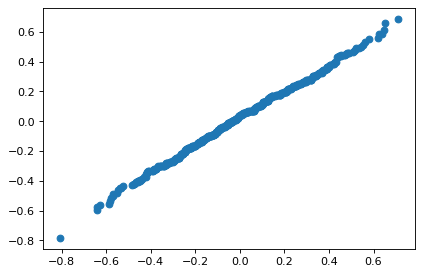

In [100]:
plt.scatter(ASD_Bias["EFFECT"].values, ASD_Bias_nDN["EFFECT"].values)

(0.8527871936927183, 6.672145714610328e-141)
SpearmanrResult(correlation=0.8296392906406785, pvalue=1.2452027281303363e-126)


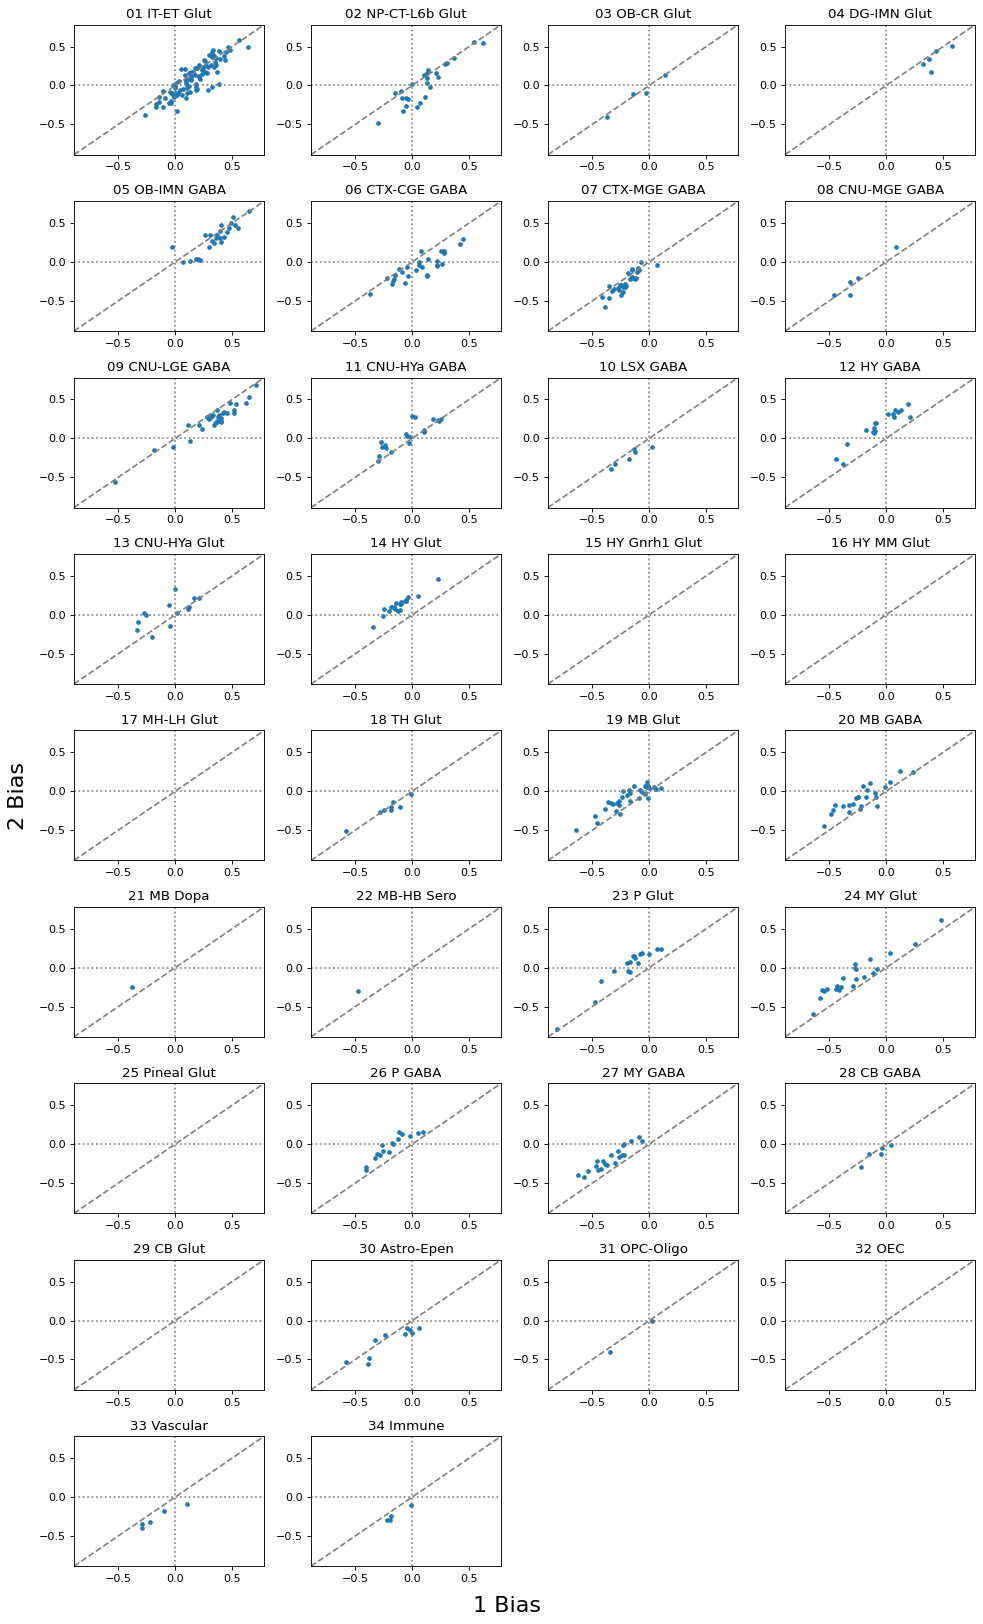

In [101]:
CompareCT_ABC(ASD_Bias, ASD_Bias_nDN)

In [105]:
SubSibDIR2 = "/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/CTRL/SubSampleSib_w_GeneProb/Subclass_SupterType_Merge/"
SibBiasDFs2 = []
for i in range(10000):
    DF = pd.read_csv("{}/cont.bias.{}.csv".format(SubSibDIR, i), index_col=0)
    SibBiasDFs2.append(DF)

In [108]:
for CT, row in ASD_Bias_nDN.iterrows():
    mat_bias = getBiasesBySTR(CT, SibBiasDFs)
    Z, P = GetPermutationP(mat_bias, row["EFFECT"])
    ASD_Bias_nDN.loc[CT, "Pvalue"] = P
    ASD_Bias_nDN.loc[CT, "Z_Match"] = Z
    ASD_Bias_nDN.loc[CT, "Z_Pvalue"] = scipy.stats.norm.sf(abs(Z))
    
acc, qvalues = stats.multitest.fdrcorrection(ASD_Bias_nDN["Pvalue"].values, alpha=0.1,
                                                   method="i")
print(sum(acc))
ASD_Bias_nDN["qvalues"] = qvalues

acc, qvalues = stats.multitest.fdrcorrection(ASD_Bias_nDN["Z_Pvalue"].values, alpha=0.1,
                                                   method="i")
print(sum(acc))
ASD_Bias_nDN["qvalues_ZP"] = qvalues

0
37


In [109]:
ASD_Bias_nDN.head(50)

EFFECT  Rank     class_id_label    Pvalue  \
STR                                                                         
0263 OT D3 Folh1 Gaba_2       0.688200     1    09 CNU-LGE GABA  0.002400   
0153 OB-in Frmd7 Gaba_4       0.656581     2     05 OB-IMN GABA  0.002700   
257 SPVC Ccdc172 Glut         0.608969     3         24 MY Glut  0.008399   
0082 L2 IT PPP-APr Glut_3     0.585558     4      01 IT-ET Glut  0.012599   
0160 OB-out Frmd7 Gaba_3      0.582148     5     05 OB-IMN GABA  0.002000   
0109 L6b/CT ENT Glut_4        0.555186     6  02 NP-CT-L6b Glut  0.001300   
0121 CT SUB Glut_2            0.550289     7  02 NP-CT-L6b Glut  0.008499   
0264 OT D3 Folh1 Gaba_3       0.528801     8    09 CNU-LGE GABA  0.026497   
0136 DG Glut_1                0.510022     9     04 DG-IMN Glut  0.026997   
0167 OB-STR-CTX Inh IMN_2     0.495655    10     05 OB-IMN GABA  0.012499   
0028 L4/5 IT CTX Glut_6       0.494261    11      01 IT-ET Glut  0.001500   
0081 L2 IT PPP-APr Glut_2     0.493084    12      01 IT-ET Glut  0.025597   
0154 OB-in Frmd7 Gaba_5       0.479292    13     05 OB-IMN GABA  0.046795   
0162 OB Dopa-Gaba_1           0.468301    14     05 OB-IMN GABA  0.034697   
123 DMH Nkx2-4 Glut           0.461550    15         14 HY Glut  0.013499   
0062 LA-BLA-BMA-PA Glut_3     0.460405    16      01 IT-ET Glut  0.002900   
0066 ENTmv-PA-COAp Glut_1     0.459432    17      01 IT-ET Glut  0.002500   
0262 OT D3 Folh1 Gaba_1       0.459256    18    09 CNU-LGE GABA  0.029497   
0276 STR D2 Gaba_3            0.448826    19    09 CNU-LGE GABA  0.014399   
0139 DG Glut_4                0.443692    20     04 DG-IMN Glut  0.029897   
0080 L2 IT PPP-APr Glut_1     0.441572    21      01 IT-ET Glut  0.006999   
0279 STR D2 Gaba_6            0.441277    22    09 CNU-LGE GABA  0.032897   
095 DMH Prdm13 Gaba           0.440273    23         12 HY GABA  0.006799   
0155 OB-in Frmd7 Gaba_6       0.437287    24     05 OB-IMN GABA  0.058394   
0060 LA-BLA-BMA-PA Glut_1     0.435569    25      01 IT-ET Glut  0.018998   
0045 L2/3 IT PIR-ENTl Glut_7  0.431699    26      01 IT-ET Glut  0.009999   
0151 OB-in Frmd7 Gaba_2       0.428956    27     05 OB-IMN GABA  0.060594   
0072 CA1-ProS Glut_4          0.397454    28      01 IT-ET Glut  0.004700   
0157 OB-in Frmd7 Gaba_8       0.396294    29     05 OB-IMN GABA  0.021098   
0067 ENTmv-PA-COAp Glut_2     0.390178    30      01 IT-ET Glut  0.004800   
0150 OB-in Frmd7 Gaba_1       0.386274    31     05 OB-IMN GABA  0.061594   
0083 L2 IT PPP-APr Glut_4     0.382512    32      01 IT-ET Glut  0.025997   
0073 CA1-ProS Glut_5          0.375385    33      01 IT-ET Glut  0.007499   
0085 L2/3 IT PPP Glut_2       0.374755    34      01 IT-ET Glut  0.084392   
105 TMd-DMH Foxd2 Gaba        0.367780    35         12 HY GABA  0.011199   
0271 STR D1 Gaba_7            0.364811    36    09 CNU-LGE GABA  0.064894   
0282 STR D1 Sema5a Gaba_2     0.364752    37    09 CNU-LGE GABA  0.076592   
0068 ENTmv-PA-COAp Glut_3     0.364259    38      01 IT-ET Glut  0.013199   
099 SBPV-PVa Six6 Satb2 Gaba  0.361592    39         12 HY GABA  0.014899   
0055 MEA Slc17a7 Glut_1       0.356445    40      01 IT-ET Glut  0.076392   
0120 CT SUB Glut_1            0.353089    41  02 NP-CT-L6b Glut  0.040196   
0144 OB Meis2 Thsd7b Gaba_2   0.350447    42     05 OB-IMN GABA  0.102290   
0169 OB-STR-CTX Inh IMN_4     0.348867    43     05 OB-IMN GABA  0.038496   
0168 OB-STR-CTX Inh IMN_3     0.345201    44     05 OB-IMN GABA  0.011799   
104 TU-ARH Otp Six6 Gaba      0.343897    45         12 HY GABA  0.017298   
0057 MEA Slc17a7 Glut_3       0.339443    46      01 IT-ET Glut  0.037496   
0141 DG-PIR Ex IMN_2          0.336110    47     04 DG-IMN Glut  0.065693   
0272 STR D1 Gaba_8            0.335545    48    09 CNU-LGE GABA  0.081392   
116 AVPV-MEPO-SFO Tbr1 Glut   0.330245    49    13 CNU-HYa Glut  0.021298   
0269 STR D1 Gaba_5            0.328134    50    09 CNU-LGE GABA  0.062294   

                           

In [116]:
dat1 = []
dat2 = []
for i in range(1000):
    df1 = SibBiasDFs[i]
    df2 = SibBiasDFs2[i]
    dat1.append(df1.head(50)["EFFECT"].mean())
    dat2.append(df2.head(50)["EFFECT"].mean())

In [123]:
asd_1 = ASD_Bias.head(50)["EFFECT"].mean()
asd_2 = ASD_Bias_nDN.head(50)["EFFECT"].mean()

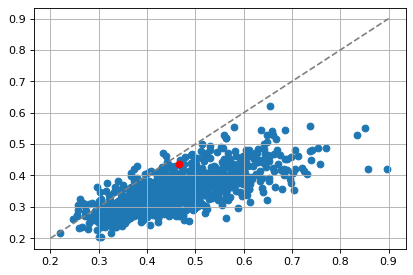

In [125]:
plt.scatter(asd_1, asd_2, color="red", zorder=100)
plt.scatter(dat1, dat2)
plt.grid(True)
plt.plot([0.2, 0.9], [0.2, 0.9], ls="--", color="grey")

In [126]:
RandGeneDIR = "/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/CTRL/RandGenes/Subclass_SupterType_Merge_DN/"
RandGeneDFs = []
for i in range(10000):
    DF = pd.read_csv("{}/cont.bias.{}.csv".format(RandGeneDIR, i), index_col=0)
    RandGeneDFs.append(DF)

In [130]:
RandGeneDIR2 = "/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/CTRL/RandGenes/Subclass_SupterType_Merge/"
RandGeneDFs2 = []
for i in range(10000):
    DF = pd.read_csv("{}/cont.bias.{}.csv".format(RandGeneDIR2, i), index_col=0)
    RandGeneDFs2.append(DF)

In [131]:
dat1 = []
dat2 = []
for i in range(1000):
    df1 = RandGeneDFs[i]
    df2 = RandGeneDFs2[i]
    dat1.append(df1.head(50)["EFFECT"].mean())
    dat2.append(df2.head(50)["EFFECT"].mean())

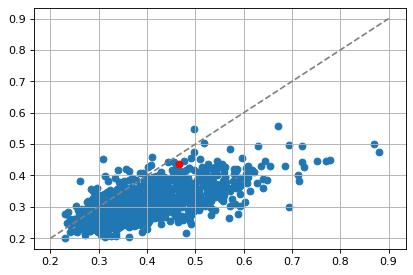

In [132]:
plt.scatter(asd_1, asd_2, color="red", zorder=100)
plt.scatter(dat1, dat2)
plt.grid(True)
plt.plot([0.2, 0.9], [0.2, 0.9], ls="--", color="grey")

In [133]:
for CT, row in ASD_Bias_nDN.iterrows():
    mat_bias = getBiasesBySTR(CT, RandGeneDFs2)
    Z, P = GetPermutationP(mat_bias, row["EFFECT"])
    ASD_Bias_nDN.loc[CT, "Pvalue"] = P
    ASD_Bias_nDN.loc[CT, "Z_Match"] = Z
    ASD_Bias_nDN.loc[CT, "Z_Pvalue"] = scipy.stats.norm.sf(abs(Z))
    
acc, qvalues = stats.multitest.fdrcorrection(ASD_Bias_nDN["Pvalue"].values, alpha=0.1,
                                                   method="i")
print(sum(acc))
ASD_Bias_nDN["qvalues"] = qvalues

acc, qvalues = stats.multitest.fdrcorrection(ASD_Bias_nDN["Z_Pvalue"].values, alpha=0.1,
                                                   method="i")
print(sum(acc))
ASD_Bias_nDN["qvalues_ZP"] = qvalues

0
36


In [140]:
ASD_Bias_nDN = ASD_Bias_nDN.sort_values("Pvalue")

In [141]:
ASD_Bias_nDN.head(50)

EFFECT  Rank     class_id_label    Pvalue  \
STR                                                                         
0263 OT D3 Folh1 Gaba_2       0.688200     1    09 CNU-LGE GABA  0.000700   
0153 OB-in Frmd7 Gaba_4       0.656581     2     05 OB-IMN GABA  0.001900   
0062 LA-BLA-BMA-PA Glut_3     0.460405    16      01 IT-ET Glut  0.002100   
257 SPVC Ccdc172 Glut         0.608969     3         24 MY Glut  0.002100   
0160 OB-out Frmd7 Gaba_3      0.582148     5     05 OB-IMN GABA  0.002800   
0109 L6b/CT ENT Glut_4        0.555186     6  02 NP-CT-L6b Glut  0.003300   
0082 L2 IT PPP-APr Glut_3     0.585558     4      01 IT-ET Glut  0.004000   
0028 L4/5 IT CTX Glut_6       0.494261    11      01 IT-ET Glut  0.004100   
0066 ENTmv-PA-COAp Glut_1     0.459432    17      01 IT-ET Glut  0.007299   
0067 ENTmv-PA-COAp Glut_2     0.390178    30      01 IT-ET Glut  0.008399   
0276 STR D2 Gaba_3            0.448826    19    09 CNU-LGE GABA  0.008999   
0080 L2 IT PPP-APr Glut_1     0.441572    21      01 IT-ET Glut  0.009299   
0262 OT D3 Folh1 Gaba_1       0.459256    18    09 CNU-LGE GABA  0.009799   
095 DMH Prdm13 Gaba           0.440273    23         12 HY GABA  0.010099   
0081 L2 IT PPP-APr Glut_2     0.493084    12      01 IT-ET Glut  0.010199   
123 DMH Nkx2-4 Glut           0.461550    15         14 HY Glut  0.011299   
0072 CA1-ProS Glut_4          0.397454    28      01 IT-ET Glut  0.012599   
0045 L2/3 IT PIR-ENTl Glut_7  0.431699    26      01 IT-ET Glut  0.012799   
105 TMd-DMH Foxd2 Gaba        0.367780    35         12 HY GABA  0.013399   
0167 OB-STR-CTX Inh IMN_2     0.495655    10     05 OB-IMN GABA  0.013699   
0073 CA1-ProS Glut_5          0.375385    33      01 IT-ET Glut  0.013799   
0121 CT SUB Glut_2            0.550289     7  02 NP-CT-L6b Glut  0.014499   
099 SBPV-PVa Six6 Satb2 Gaba  0.361592    39         12 HY GABA  0.015098   
0060 LA-BLA-BMA-PA Glut_1     0.435569    25      01 IT-ET Glut  0.015598   
0139 DG Glut_4                0.443692    20     04 DG-IMN Glut  0.015798   
0068 ENTmv-PA-COAp Glut_3     0.364259    38      01 IT-ET Glut  0.016598   
094 SCH Six6 Cdc14a Gaba      0.278054    70         12 HY GABA  0.017798   
0264 OT D3 Folh1 Gaba_3       0.528801     8    09 CNU-LGE GABA  0.018298   
0136 DG Glut_1                0.510022     9     04 DG-IMN Glut  0.018398   
104 TU-ARH Otp Six6 Gaba      0.343897    45         12 HY GABA  0.018698   
0157 OB-in Frmd7 Gaba_8       0.396294    29     05 OB-IMN GABA  0.019698   
0279 STR D2 Gaba_6            0.441277    22    09 CNU-LGE GABA  0.019698   
0292 IA Mgp Gaba_3            0.305738    61    09 CNU-LGE GABA  0.020098   
0063 LA-BLA-BMA-PA Glut_4     0.323444    53      01 IT-ET Glut  0.020498   
0010 L5/6 IT TPE-ENT Glut_4   0.262983    81      01 IT-ET Glut  0.021798   
0050 IT AON-TT-DP Glut_5      0.325921    52      01 IT-ET Glut  0.021898   
116 AVPV-MEPO-SFO Tbr1 Glut   0.330245    49    13 CNU-HYa Glut  0.022098   
0168 OB-STR-CTX Inh IMN_3     0.345201    44     05 OB-IMN GABA  0.024398   
0271 STR D1 Gaba_7            0.364811    36    09 CNU-LGE GABA  0.025797   
0057 MEA Slc17a7 Glut_3       0.339443    46      01 IT-ET Glut  0.027297   
0074 CA1-ProS Glut_6          0.318160    56      01 IT-ET Glut  0.028097   
0162 OB Dopa-Gaba_1           0.468301    14     05 OB-IMN GABA  0.029397   
0097 SUB-ProS Glut_2          0.226817   101      01 IT-ET Glut  0.031797   
0269 STR D1 Gaba_5            0.328134    50    09 CNU-LGE GABA  0.032297   
0083 L2 IT PPP-APr Glut_4     0.382512    32      01 IT-ET Glut  0.032697   
0069 CA1-ProS Glut_1          0.238997    93      01 IT-ET Glut  0.036496   
0268 STR D1 Gaba_4            0.320954    54    09 CNU-LGE GABA  0.036896   
0154 OB-in Frmd7 Gaba_5       0.479292    13     05 OB-IMN GABA  0.036996   
0047 IT AON-TT-DP Glut_2      0.266065    78      01 IT-ET Glut  0.038196   
0272 STR D1 Gaba_8            0.335545    48    09 CNU-LGE GABA  0.038296   

                           

### Cluster 5k level

In [145]:
ASD_Cluster_Bias = pd.read_csv("dat/Bias/ASD.ClusterV3.DN.Z2.csv", index_col=0)

In [149]:
SubSibDIR_ClusterV3 = "/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/CTRL/SubSampleSib_w_GeneProb/Cluster_V3_Jun15/"
SibBiasDFs_ClusterV3 = []
for i in range(10000):
    DF = pd.read_csv("{}/cont.bias.{}.csv".format(SubSibDIR_ClusterV3, i), index_col=0)
    SibBiasDFs_ClusterV3.append(DF)

In [152]:
for CT, row in ASD_Cluster_Bias.iterrows():
    mat_bias = getBiasesBySTR(CT, SibBiasDFs_ClusterV3)
    Z, P = GetPermutationP(mat_bias, row["EFFECT"])
    ASD_Cluster_Bias.loc[CT, "Pvalue"] = P
    ASD_Cluster_Bias.loc[CT, "Z_Match"] = Z
    ASD_Cluster_Bias.loc[CT, "Z_Pvalue"] = scipy.stats.norm.sf(abs(Z))
    
acc, qvalues = stats.multitest.fdrcorrection(ASD_Cluster_Bias["Pvalue"].values, alpha=0.1,
                                                   method="i")
print(sum(acc))
ASD_Cluster_Bias["qvalues"] = qvalues
acc, qvalues = stats.multitest.fdrcorrection(ASD_Cluster_Bias["Z_Pvalue"].values, alpha=0.1,
                                               method="i")
print(sum(acc))
ASD_Cluster_Bias["qvalues_ZP"] = qvalues

/home/jw3514/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jw3514/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jw3514/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jw3514/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/jw3514/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


736
2601


In [210]:
#ASD_Cluster_Bias.head(10)

In [154]:
ASD_Cluster_Bias.to_csv("dat/Bias/ASD.ClusterV3.DN.Z2.palues.csv")

In [174]:
Classes = ["01 IT-ET Glut", "06 CTX-CGE GABA", "07 CTX-MGE GABA", "12 HY GABA", "14 HY Glut", "18 TH Glut",
          "09 CNU-LGE GABA"]
Class_Pvals = []
for Class in Classes:
    tmp = ASD_Cluster_Bias[ASD_Cluster_Bias["class_id_label"]==Class]
    Class_Pvals.append(tmp["Pvalue"].values)

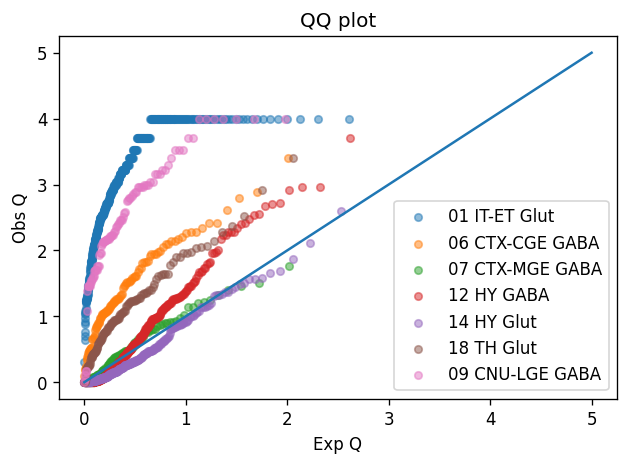

In [175]:
QQplot(Class_Pvals, Classes)

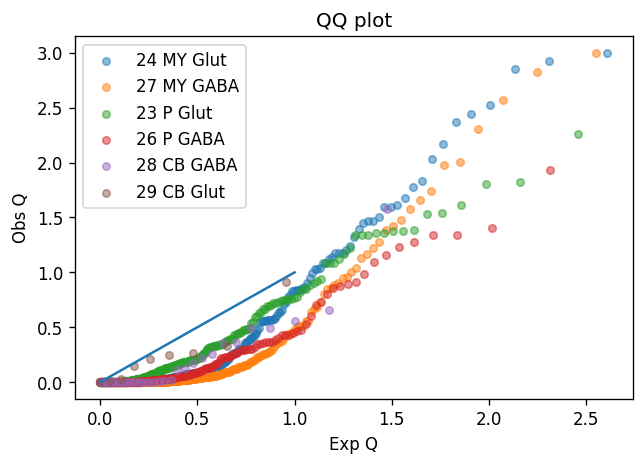

In [184]:
Classes = ["24 MY Glut", "27 MY GABA", "23 P Glut", "26 P GABA", "28 CB GABA", "29 CB Glut"]
Class_Pvals = []
for Class in Classes:
    tmp = ASD_Cluster_Bias[ASD_Cluster_Bias["class_id_label"]==Class]
    Class_Pvals.append(tmp["Pvalue"].values)
QQplot(Class_Pvals, Classes)

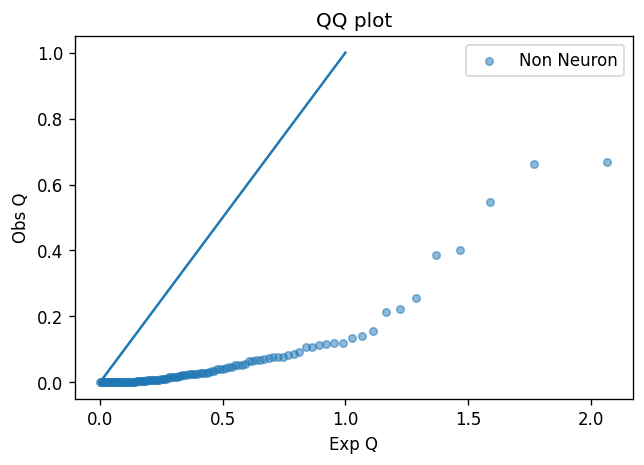

In [187]:
_Class = ["30 Astro-Epen", "31 OPC-Oligo", "32 OEC", "33 Vascular", "34 Immune"]
tmp = ASD_Cluster_Bias[ASD_Cluster_Bias["class_id_label"].isin(_Class)]
QQplot([tmp["Pvalue"].values], ["Non Neuron"])

In [ ]:
Classes = ["30 Astro-Epen", "31 OPC-Oligo", "32 OEC", "33 Vascular", "34 Immune"]
Class_Pvals = []
for Class in Classes:
    tmp = ASD_Cluster_Bias[ASD_Cluster_Bias["class_id_label"]==Class]
    Class_Pvals.append(tmp["Pvalue"].values)
QQplot(Class_Pvals, Classes)

#### If Sibling use DN

In [188]:
SubSibDIR_ClusterV3_DN = "/home/jw3514/Work/CellType_Psy/AllenBrainCellAtlas/dat/CTRL/SubSampleSib_w_GeneProb/Cluster_V3_Jun17_DN2//"
SibBiasDFs_ClusterV3_DN = []
for i in range(10000):
    DF = pd.read_csv("{}/cont.bias.{}.csv".format(SubSibDIR_ClusterV3_DN, i), index_col=0)
    SibBiasDFs_ClusterV3_DN.append(DF)

In [189]:
ASD_Cluster_Bias_for_DN = pd.read_csv("dat/Bias/ASD.ClusterV3.DN.Z2.csv", index_col=0)

In [195]:
for CT, row in ASD_Cluster_Bias_for_DN.iterrows():
    mat_bias = getBiasesBySTR(CT, SibBiasDFs_ClusterV3_DN)
    Z, P = GetPermutationP(mat_bias, row["EFFECT"])
    ASD_Cluster_Bias_for_DN.loc[CT, "Bias_Adj"] = row["EFFECT"] - np.mean(mat_bias)
    ASD_Cluster_Bias_for_DN.loc[CT, "Pvalue"] = P
    ASD_Cluster_Bias_for_DN.loc[CT, "Z_Match"] = Z
    if Z == Z:
        ASD_Cluster_Bias_for_DN.loc[CT, "Z_Pvalue"] = scipy.stats.norm.sf(abs(Z))
    else:
        ASD_Cluster_Bias_for_DN.loc[CT, "Z_Pvalue"] = 1
    
acc, qvalues = stats.multitest.fdrcorrection(ASD_Cluster_Bias_for_DN["Pvalue"].values, alpha=0.1,
                                                   method="i")
print(sum(acc))
ASD_Cluster_Bias_for_DN["qvalues"] = qvalues
acc, qvalues = stats.multitest.fdrcorrection(ASD_Cluster_Bias_for_DN["Z_Pvalue"].values, alpha=0.1,
                                               method="i")
print(sum(acc))
ASD_Cluster_Bias_for_DN["qvalues_ZP"] = qvalues

/home/jw3514/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jw3514/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jw3514/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jw3514/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/jw3514/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


411
1638


In [196]:
ASD_Cluster_Bias_for_DN.head(10)

EFFECT  Rank     class_id_label  \
STR                                                            
0460 CT SUB Glut_2         1.157530     1  02 NP-CT-L6b Glut   
0099 L4/5 IT CTX Glut_6    1.141159     2      01 IT-ET Glut   
0100 L4/5 IT CTX Glut_6    1.132554     3      01 IT-ET Glut   
0101 L4/5 IT CTX Glut_6    1.098343     4      01 IT-ET Glut   
0940 OT D3 Folh1 Gaba_2    1.096231     5    09 CNU-LGE GABA   
0336 L2/3 IT PPP Glut_2    1.092795     6      01 IT-ET Glut   
0081 L4/5 IT CTX Glut_2    1.085321     7      01 IT-ET Glut   
0326 L2 IT PPP-APr Glut_3  1.057868     8      01 IT-ET Glut   
0333 L2/3 IT PPP Glut_2    1.029659     9      01 IT-ET Glut   
0941 OT D3 Folh1 Gaba_3    1.026639    10    09 CNU-LGE GABA   

                              CCF_broad.freq  \
STR                                            
0460 CT SUB Glut_2          RHP:0.74,NA:0.07   
0099 L4/5 IT CTX Glut_6       Isocortex:0.96   
0100 L4/5 IT CTX Glut_6       Isocortex:0.99   
0101 L4/5 IT CTX Glut_6       Isocortex:0.99   
0940 OT D3 Folh1 Gaba_2            STRv:0.89   
0336 L2/3 IT PPP Glut_2    RHP:0.76,HIP:0.24   
0081 L4/5 IT CTX Glut_2          Isocortex:1   
0326 L2 IT PPP-APr Glut_3  RHP:0.72,HIP:0.14   
0333 L2/3 IT PPP Glut_2    HIP:0.47,RHP:0.47   
0941 OT D3 Folh1 Gaba_3    STRv:0.61,NA:0.28   

                                                            CCF_acronym.freq  \
STR                                                                            
0460 CT SUB Glut_2                     SUB:0.41,ProS:0.31,CA1so:0.06,TR:0.06   
0099 L4/5 IT CTX Glut_6    VISpm2/3:0.15,RSPagl2/3:0.14,RSPd2/3:0.11,VISp...   
0100 L4/5 IT CTX Glut_6    VISp2/3:0.63,VISl2/3:0.06,VISp4:0.04,VISp1:0.0...   
0101 L4/5 IT CTX Glut_6    VISp2/3:0.46,VISp4:0.15,RSPagl1:0.05,RSPd1:0.0...   
0940 OT D3 Folh1 Gaba_2                                     OT:0.51,ACB:0.38   
0336 L2/3 IT PPP Glut_2                          PRE:0.5,DG-mo:0.24,SUB:0.23   
0081 L4/5 IT CTX Glut_2    SSp-bfd4:0.17,SSp-m4:0.14,SSs4:0.11,SSp-ul4:0....   
0326 L2 IT PPP-APr Glut_3                      POST:0.34,PRE:0.34,DG-mo:0.14   
0333 L2/3 IT PPP Glut_2                                  DG-mo:0.47,PRE:0.42   
0941 OT D3 Folh1 Gaba_3                                       OT:0.6,NA:0.27   

                           v3.size  v2.size  Pvalue   Z_Match      Z_Pvalue  \
STR                                                                           
0460 CT SUB Glut_2           527.0   1234.0  0.0001  4.951735  3.677740e-07   
0099 L4/5 IT CTX Glut_6      132.0   5923.0  0.0001  5.386690  3.588352e-08   
0100 L4/5 IT CTX Glut_6    12928.0  59859.0  0.0001  5.080032  1.886854e-07   
0101 L4/5 IT CTX Glut_6     1012.0  10979.0  0.0001  5.128297  1.461877e-07   
0940 OT D3 Folh1 Gaba_2      226.0      0.0  0.0007  3.630985  1.411706e-04   
0336 L2/3 IT PPP Glut_2      685.0   2848.0  0.0004  3.948340  3.934756e-05   
0081 L4/5 IT CTX Glut_2      814.0   8954.0  0.0001  4.829065  6.858790e-07   
0326 L2 IT PPP-APr Glut_3    200.0    527.0  0.0020  3.451354  2.788903e-04   
0333 L2/3 IT PPP Glut_2      973.0   2482.0  0.0033  3.354194  3.979834e-04   
0941 OT D3 Folh1 Gaba_3     1025.0     10.0  0.0026  3.268521  5.405558e-04   

                            qvalues  qvalues_ZP  Bias_Adj  
STR                                                        
0460 CT SUB Glut_2         0.017738    0.000217  1.086733  
0099 L4/5 IT CTX Glut_6    0.017738    0.000095  1.114084  
0100 L4/5 IT CTX Glut_6    0.017738    0.000143  1.054695  
0101 L4/5 IT CTX Glut_6    0.017738    0.000130  1.064848  
0940 OT D3 Folh1 Gaba_2    0.032965    0.004293  0.828945  
0336 L2/3 IT PPP Glut_2    0.026944    0.002223  0.890668  
0081 L4/5 IT CTX Glut_2    0.017738    0.000329  0.967996  
0326 L2 IT PPP-APr Glut_3  0.046274    0.006318  0.823572  
0333 L2/3 IT PPP Glut_2    0.060347    0.007742  0.793023  
0941 OT D3 Folh1 Gaba_3    0.053215    0.009086  0.768086

In [197]:
ASD_Cluster_Bias_for_DN.to_csv("dat/Bias/ASD.ClusterV3.DN.Z2.Sib.DN.palues.csv")

In [209]:
ASD_Cluster_Bias_for_DN[ASD_Cluster_Bias_for_DN["qvalues"]<0.05].shape

(247, 13)

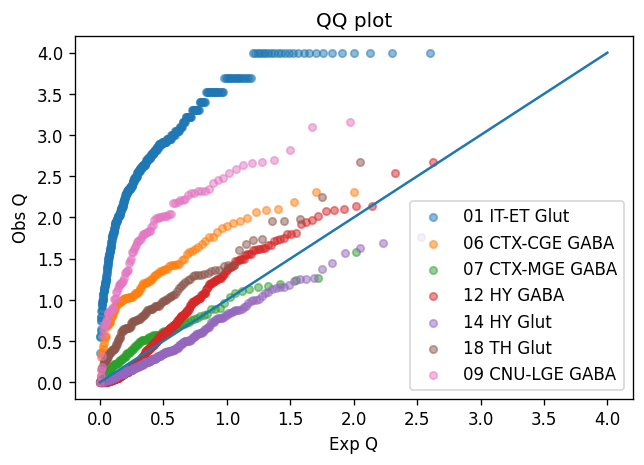

In [194]:
Classes = ["01 IT-ET Glut", "06 CTX-CGE GABA", "07 CTX-MGE GABA", "12 HY GABA", "14 HY Glut", "18 TH Glut",
          "09 CNU-LGE GABA"]
Class_Pvals = []
for Class in Classes:
    tmp = ASD_Cluster_Bias_for_DN[ASD_Cluster_Bias_for_DN["class_id_label"]==Class]
    Class_Pvals.append(tmp["Pvalue"].values)
QQplot(Class_Pvals, Classes)

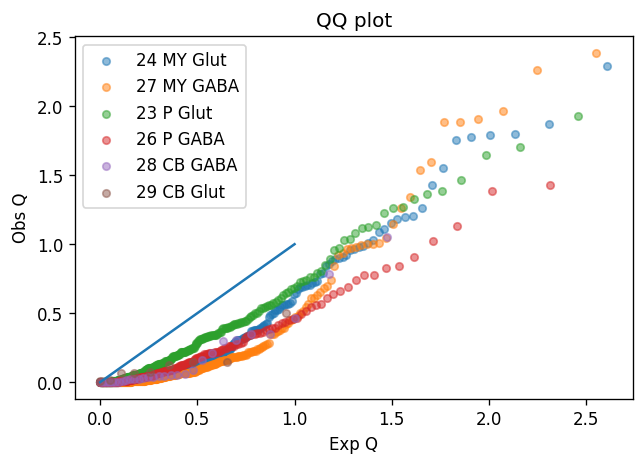

In [193]:
Classes = ["24 MY Glut", "27 MY GABA", "23 P Glut", "26 P GABA", "28 CB GABA", "29 CB Glut"]
Class_Pvals = []
for Class in Classes:
    tmp = ASD_Cluster_Bias_for_DN[ASD_Cluster_Bias_for_DN["class_id_label"]==Class]
    Class_Pvals.append(tmp["Pvalue"].values)
QQplot(Class_Pvals, Classes)

In [205]:
1 * (30000)  + 12800

42800

In [206]:
15000 * 10 / 42800

3.5046728971962615

In [207]:
640000 / 750

853.3333333333334

In [201]:
15000 * 10 / 12800

11.71875

In [202]:
15000 * 10 / 12800 * 32

375.0

# Old

In [2]:
ASD_GW = pd.read_csv("../../ASD_Circuits/dat/Unionize_bias/Spark_Meta_EWS.GeneWeight.csv", header=None)
ASD_Genes = ASD_GW[0].values

SCZ_GW = pd.read_csv("../../ASD_Circuits/dat/Unionize_bias/SCZ.top61.gw.csv", header=None)
SCZ_Genes = SCZ_GW[0].values

In [3]:
Mouse_V2_ExpL = pd.read_csv("./dat/ExpressionMats/Subclass_V2_ExpMat.csv", index_col=0)
Mouse_V3_ExpL = pd.read_csv("./dat/ExpressionMats/Subclass_V3_ExpMat.csv", index_col=0)
Mouse_V2_Z1 = pd.read_csv("./dat/ExpressionMats/Subclass_V2_Z1Mat.csv", index_col=0)
Mouse_V3_Z1 = pd.read_csv("./dat/ExpressionMats/Subclass_V3_Z1Mat.csv", index_col=0)

In [62]:
#Mouse_V2_Cluster_ExpL = pd.read_csv("./dat/ExpressionMats/Cluster_V2_Z1Mat.csv", index_col=0)
#Mouse_V3_Cluster_ExpL = pd.read_csv("./dat/ExpressionMats/Subclass_V3_ExpMat.csv", index_col=0)
Mouse_V2_Cluster_Z1 = pd.read_csv("./dat/ExpressionMats/Cluster_V2_Z1Mat.csv", index_col=0)
Mouse_V3_Cluster_Z1 = pd.read_csv("./dat/ExpressionMats/Cluster_V3_Z1Mat.csv", index_col=0)

In [5]:
SCZ_Genes = [x for x in SCZ_Genes if x in Mouse_V3_ExpL.index.values]
ASD_Genes = [x for x in ASD_Genes if x in Mouse_V3_ExpL.index.values]

In [14]:
CT = "046 Vip Gaba"
#CT = "053 Sst Gaba"

In [18]:
def test(CT):
    Mouse_SC_Exp = Mouse_V3_ExpL
    Mouse_SC_Z1 = Mouse_V3_Z1

    MeanClassExp = Mouse_SC_Exp.loc[:, CT].mean()
    MeanClassZ1 = Mouse_SC_Z1.loc[:, CT].mean()
    MeanASDExp = Mouse_SC_Exp.loc[ASD_Genes, CT].mean()
    MeanASDZ1 = Mouse_SC_Z1.loc[ASD_Genes, CT].mean()
    MeanSCZExp = Mouse_SC_Exp.loc[SCZ_Genes, CT].mean()
    MeanSCZZ1 = Mouse_SC_Z1.loc[SCZ_Genes, CT].mean()
    return MeanClassZ1, MeanASDZ1, MeanSCZZ1

In [19]:
print(MeanClassZ1, MeanASDZ1, MeanSCZZ1)

-0.37465858573928584 -0.22476553941708902 -0.3016586529534805


In [20]:
CT = "046 Vip Gaba"
test(CT)

(-0.37465858573928584, -0.22476553941708902, -0.3016586529534805)

In [21]:
CT = "047 Sncg Gaba"
test(CT)

(0.14277722790778977, 0.17817021440293587, 0.1763078459947906)

In [22]:
CT = "049 Lamp5 Gaba"
test(CT)

(-0.07831047919200888, 0.0022957884756653743, 0.08697249091185637)

In [23]:
CT = "051 Pvalb chandelier Gaba"
test(CT)

(0.10466783465388162, 0.07613996881933299, 0.1441595324049876)

In [24]:
CT = "052 Pvalb Gaba"
test(CT)

(0.19966419506244018, 0.19237351999013946, 0.2208869588081261)

In [25]:
CT = "053 Sst Gaba"
test(CT)

(0.15016734504938073, 0.242179487695686, 0.2599373357788551)

In [26]:
Mouse_SC_Exp = Mouse_V3_ExpL
Mouse_SC_Z1 = Mouse_V3_Z1

MeanClassExp = Mouse_SC_Exp.loc[:, CT].mean()
MeanClassZ1 = Mouse_SC_Z1.loc[:, CT].mean()
MeanASDExp = Mouse_SC_Exp.loc[ASD_Genes, CT].mean()
MeanASDZ1 = Mouse_SC_Z1.loc[ASD_Genes, CT].mean()
MeanSCZExp = Mouse_SC_Exp.loc[SCZ_Genes, CT].mean()
MeanSCZZ1 = Mouse_SC_Z1.loc[SCZ_Genes, CT].mean()

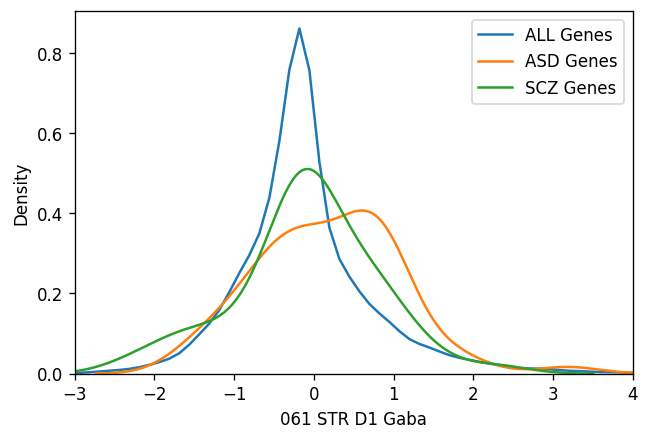

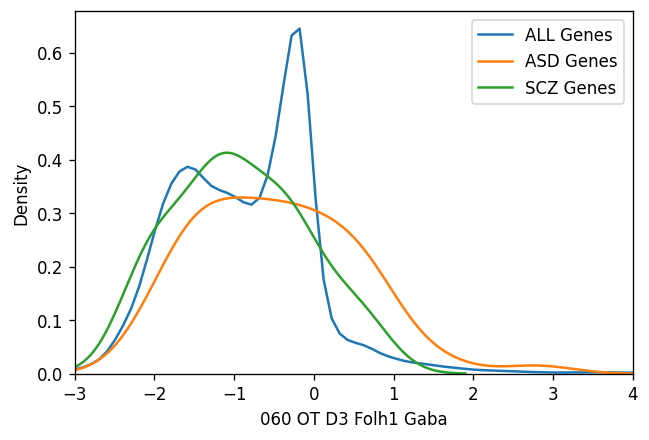

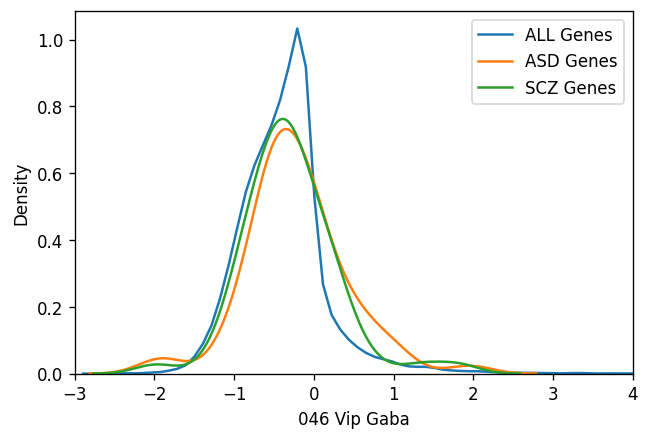

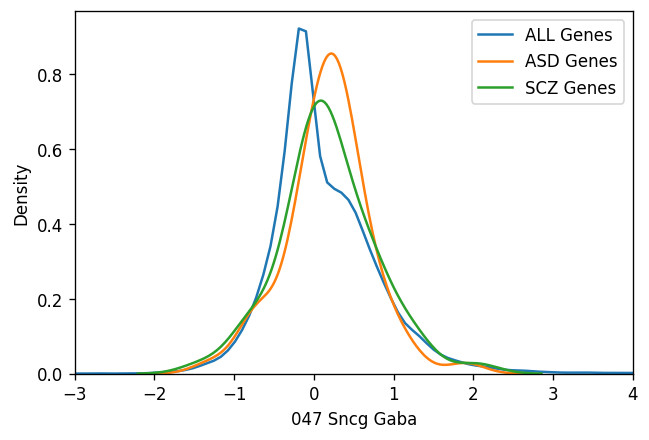

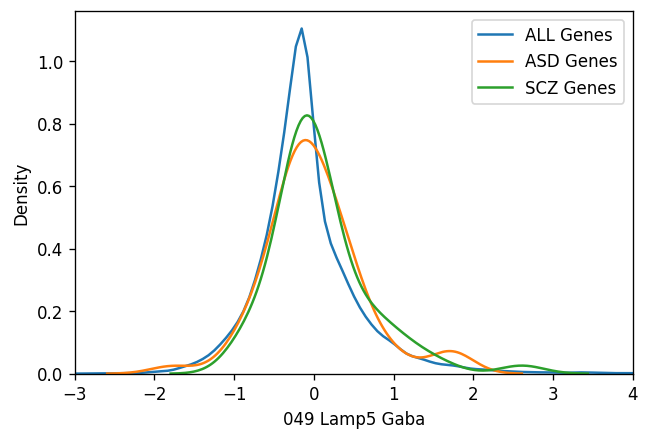

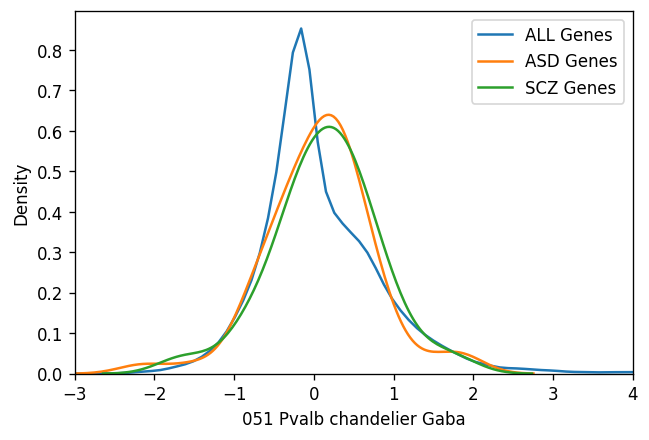

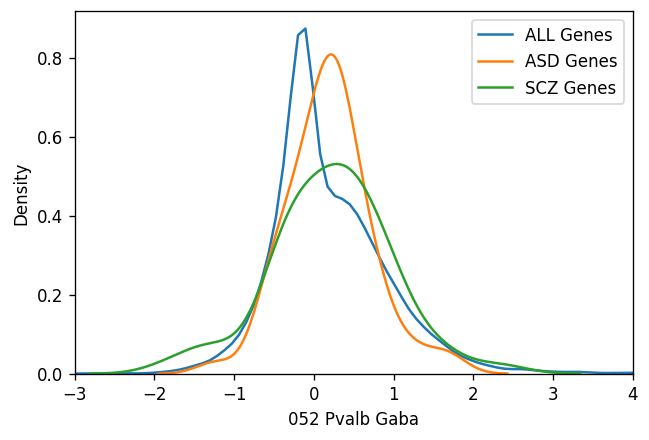

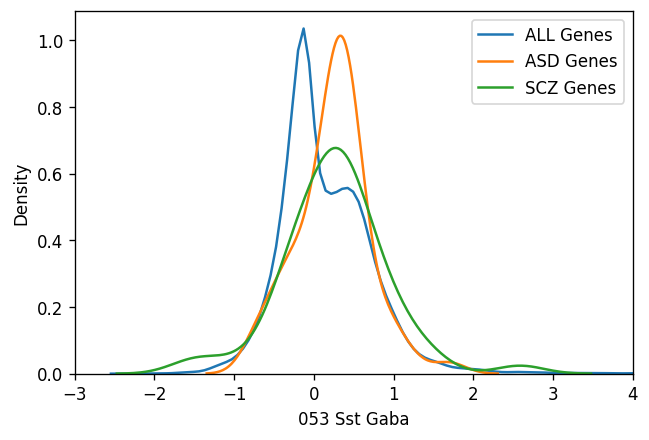

In [49]:
CT = "053 Sst Gaba"
CT = "046 Vip Gaba"

TestCellTypes = ["061 STR D1 Gaba", "060 OT D3 Folh1 Gaba", "046 Vip Gaba", "047 Sncg Gaba", 
                "049 Lamp5 Gaba", "051 Pvalb chandelier Gaba", "052 Pvalb Gaba", "053 Sst Gaba"]

for CT in TestCellTypes:
    plt.figure(dpi=120)

    sns.kdeplot(Mouse_SC_Z1.loc[:, CT], label="ALL Genes")
    sns.kdeplot(Mouse_SC_Z1.loc[ASD_Genes, CT], label="ASD Genes")
    sns.kdeplot(Mouse_SC_Z1.loc[SCZ_Genes, CT], label="SCZ Genes")
    plt.xlim(-3, 4)
    plt.legend()


In [39]:
Human_SC_Exp = pd.read_csv("../dat2/HumanCT.ExpL.log.csv", index_col=0)
Human_SC_Z1 = pd.read_csv("../dat2/Human.CT.AllCell.Z1.Entrez.csv", index_col=0)
Human_SC_Exp.columns = [int(x) for x in Human_SC_Exp.columns.values]
#Human_SC_Z2.columns = [int(x) for x in Human_SC_Z2.columns.values]
Human_SC_Z1.columns = [int(x) for x in Human_SC_Z1.columns.values]

In [40]:
CT = 247 # MGE sst

In [53]:
#MeanClassExp = Human_SC_Exp.loc[:, clusters].mean()
#MeanClassZ1 = Human_SC_Z1.loc[:, clusters].mean()
#MeanASDExp = Human_SC_Exp.loc[ASD_Genes, clusters].mean()
#MeanASDZ1 = Human_SC_Z1.loc[ASD_Genes, clusters].mean()
#MeanSCZExp = Human_SC_Exp.loc[SCZ_Genes, clusters].mean()
#MeanSCZZ1 = Human_SC_Z1.loc[SCZ_Genes, clusters].mean()

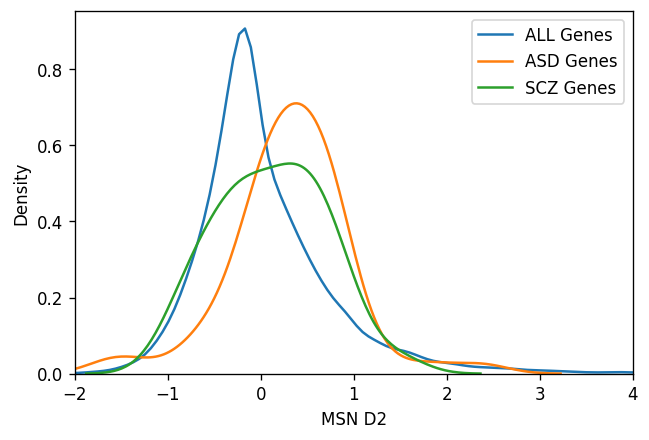

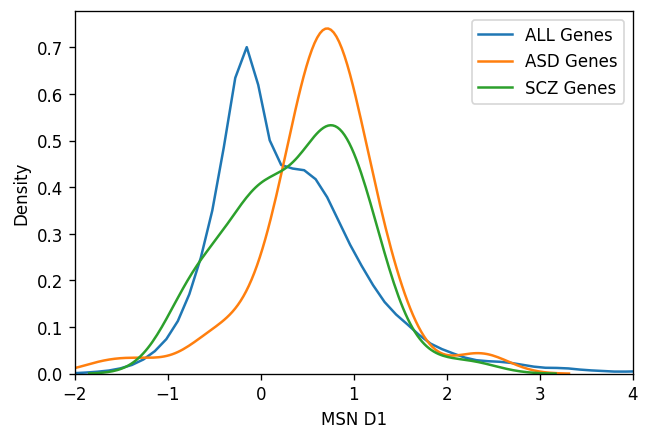

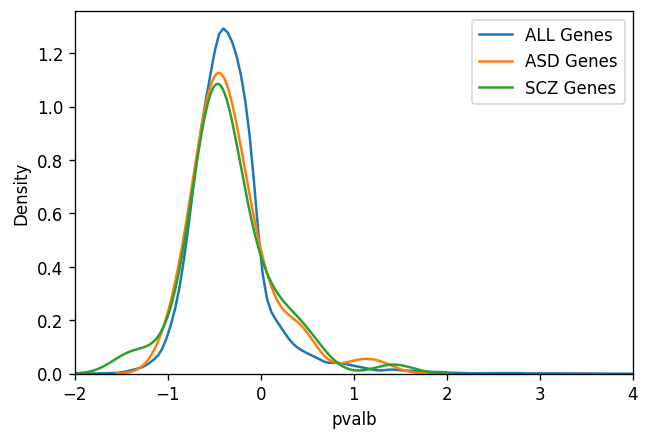

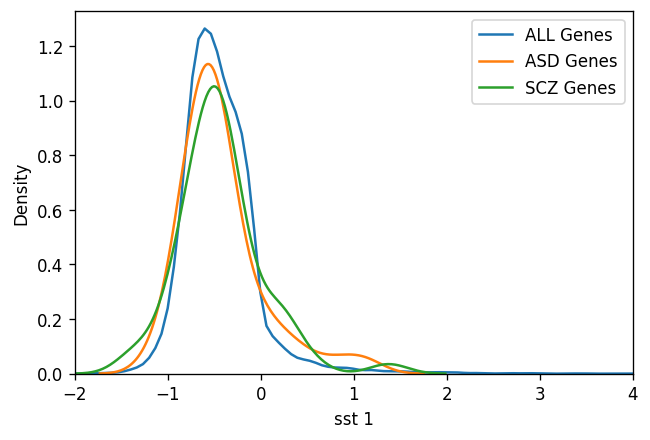

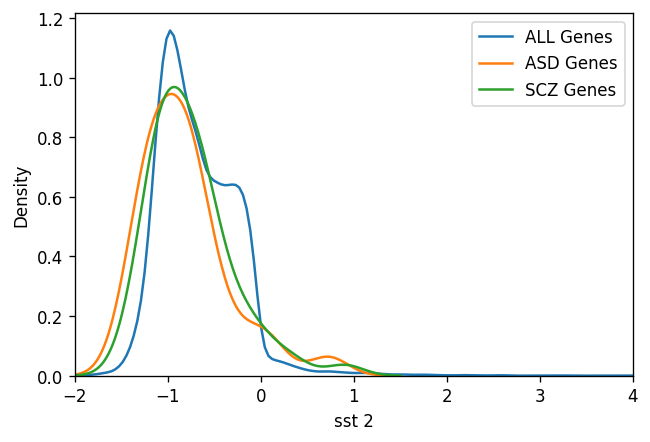

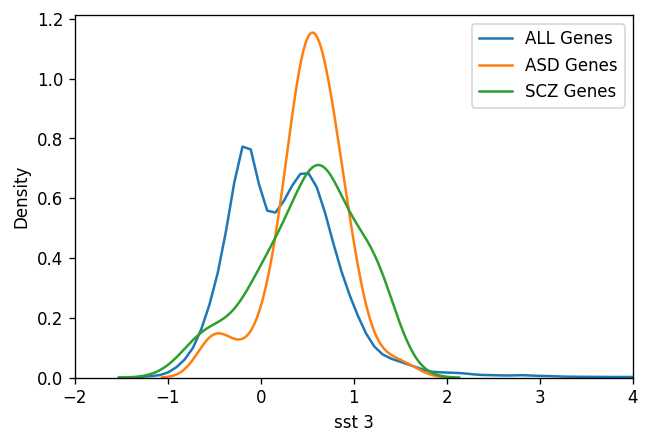

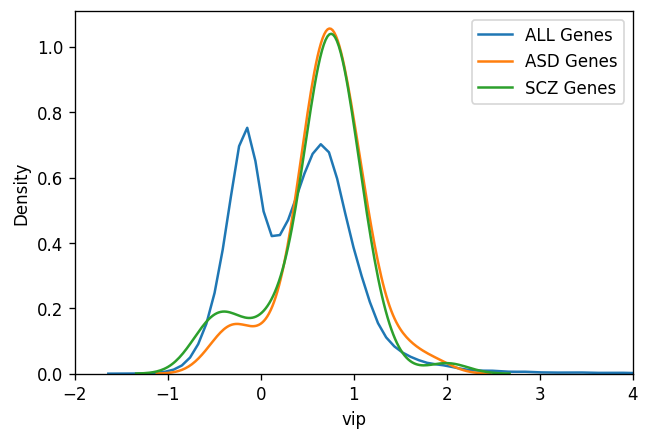

In [58]:
TestCellTypes = [207, 209, 240, 241, 242, 247, 276]
Names = ["MSN D2", "MSN D1", "pvalb", "sst 1", "sst 2", "sst 3", "vip"]
for name, CT in zip(Names, TestCellTypes):
    plt.figure(dpi=120)

    sns.kdeplot(Human_SC_Z1.loc[:, CT], label="ALL Genes")
    sns.kdeplot(Human_SC_Z1.loc[ASD_Genes, CT], label="ASD Genes")
    sns.kdeplot(Human_SC_Z1.loc[SCZ_Genes, CT], label="SCZ Genes")

    plt.xlim(-2, 4)
    plt.legend()
    plt.xlabel(name)

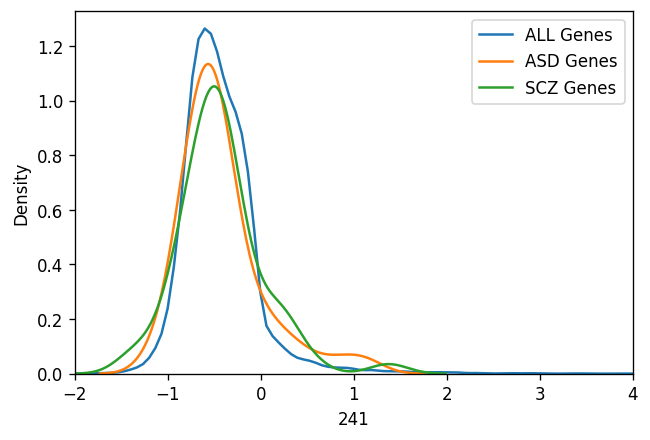

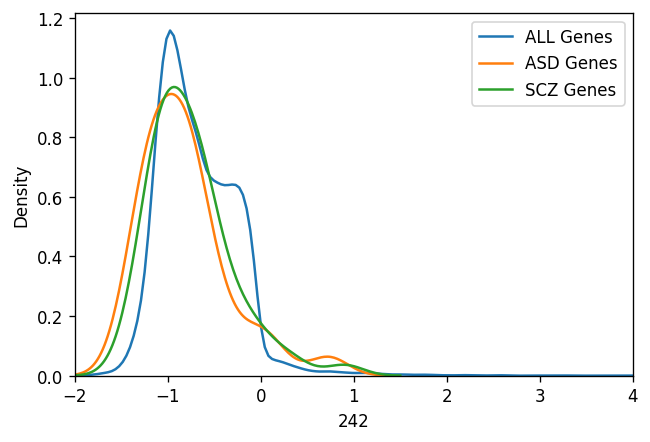

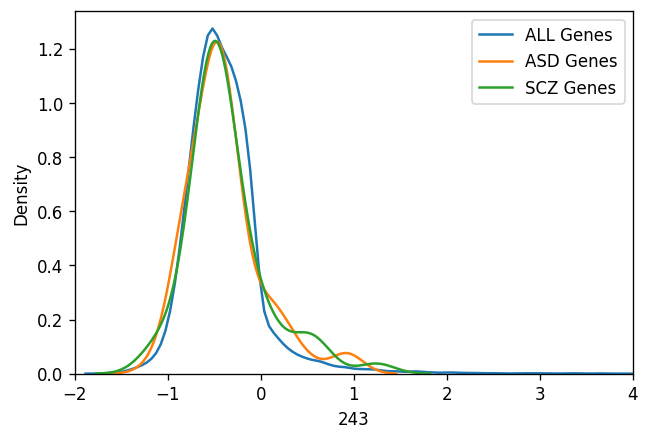

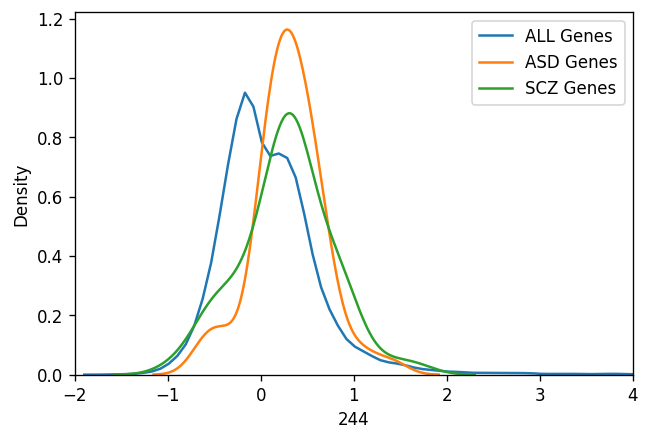

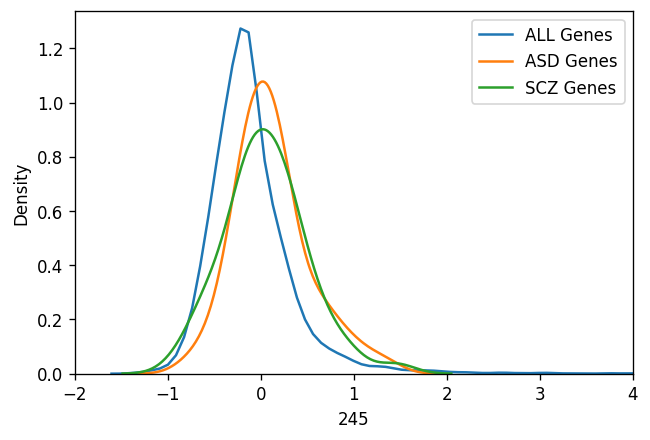

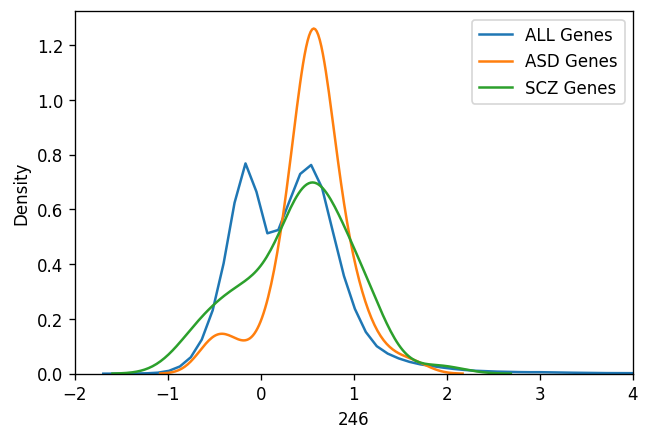

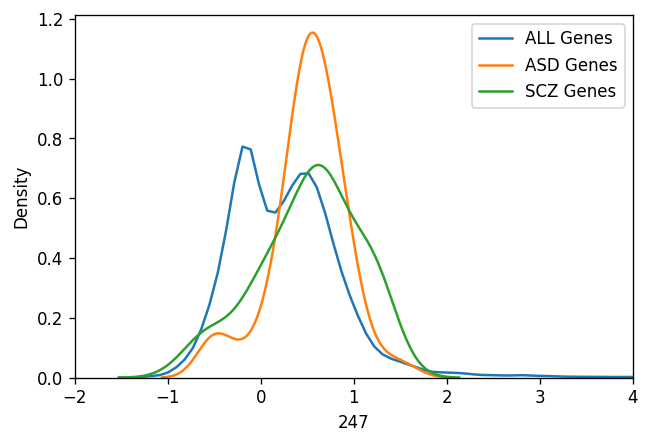

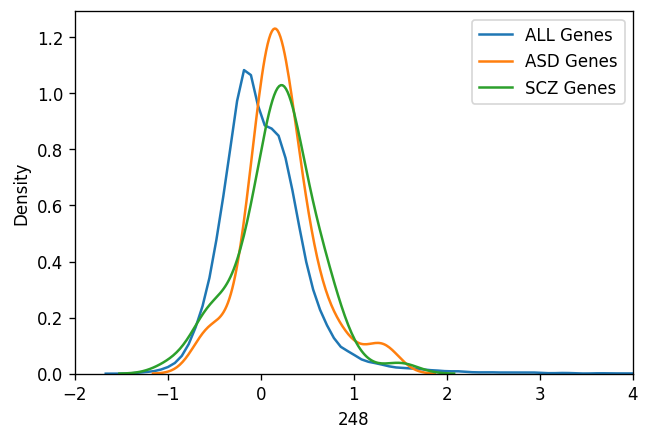

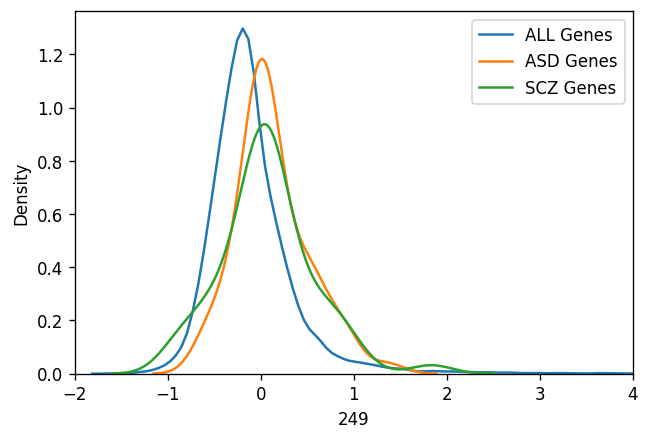

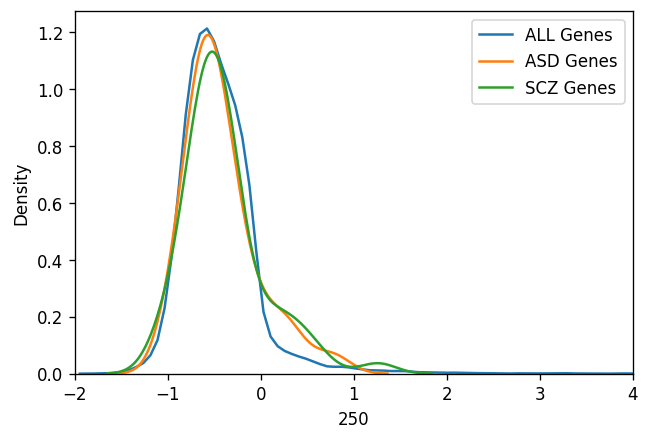

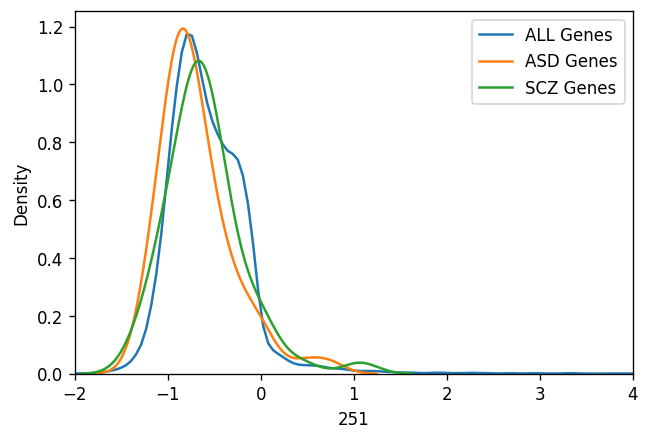

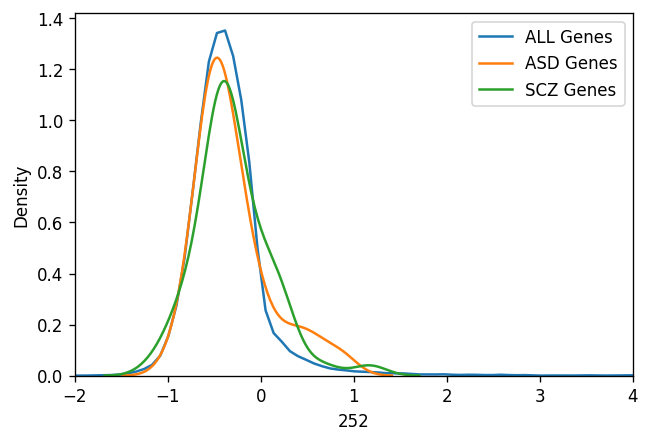

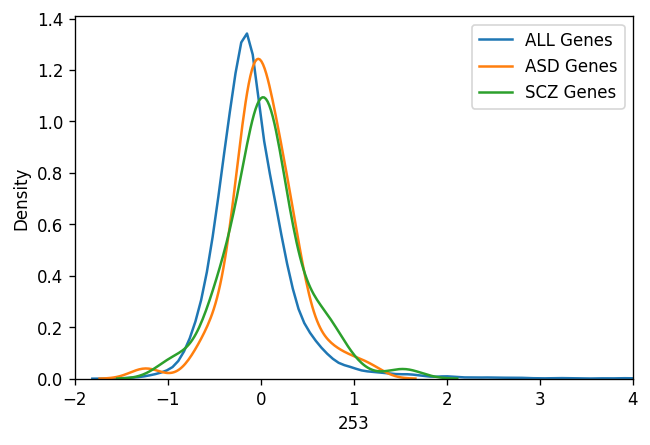

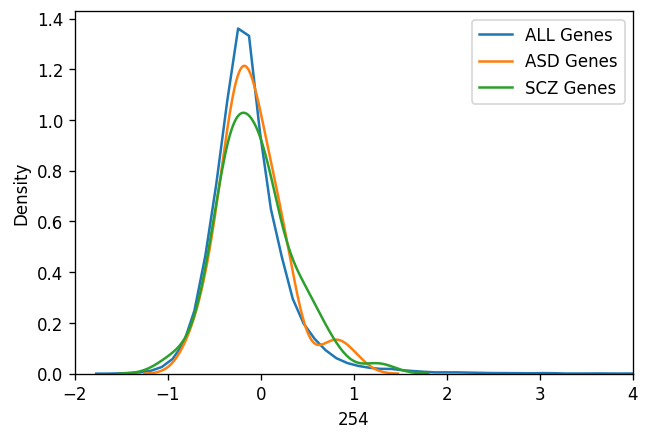

In [61]:

TestCellTypes = range(241, 255, 1) # SST
for CT in TestCellTypes:
    plt.figure(dpi=120)

    sns.kdeplot(Human_SC_Z1.loc[:, CT], label="ALL Genes")
    sns.kdeplot(Human_SC_Z1.loc[ASD_Genes, CT], label="ASD Genes")
    sns.kdeplot(Human_SC_Z1.loc[SCZ_Genes, CT], label="SCZ Genes")

    plt.xlim(-2, 4)
    plt.legend()

In [63]:
MouseSC_Cluster_Ann = pd.read_excel("../../data/Allen_Mouse_Brain_Cell_Atlas/SuppTables/41586_2023_6812_MOESM8_ESM.xlsx",
                          sheet_name = "cluster_annotation", index_col="cluster_id_label")

In [68]:
DF_TestCellTypes = MouseSC_Cluster_Ann[MouseSC_Cluster_Ann["subclass_label"]=="Vip Gaba"]

/tmp/ipykernel_1160024/2268003402.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(dpi=120)


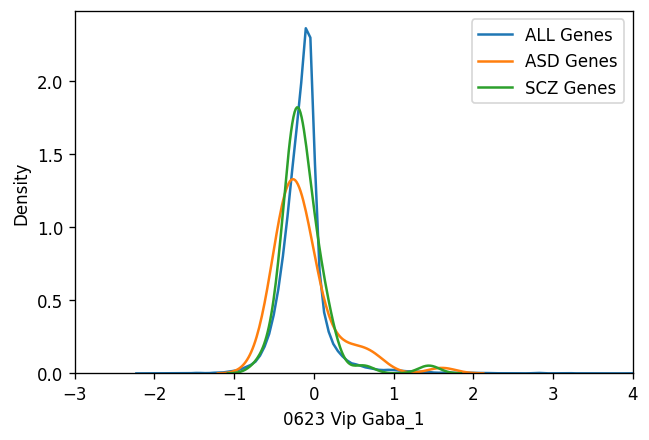

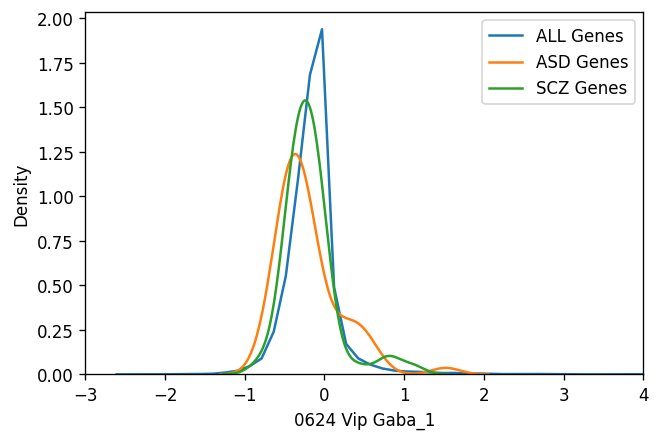

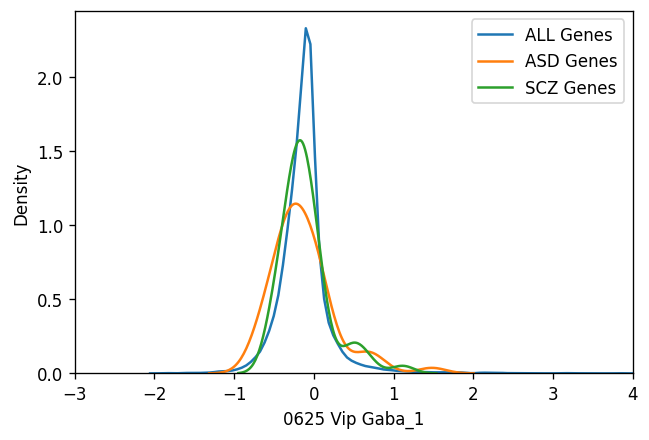

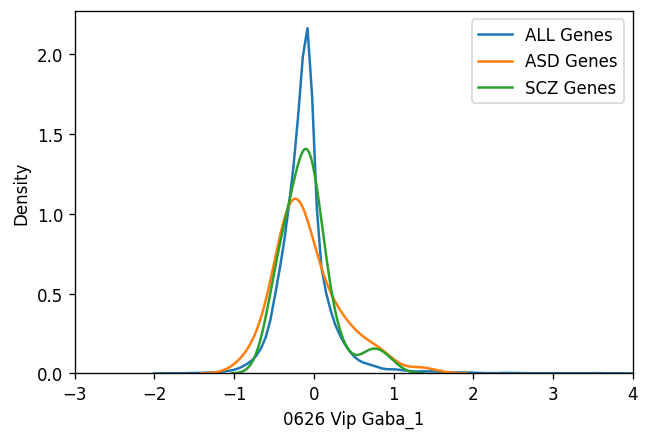

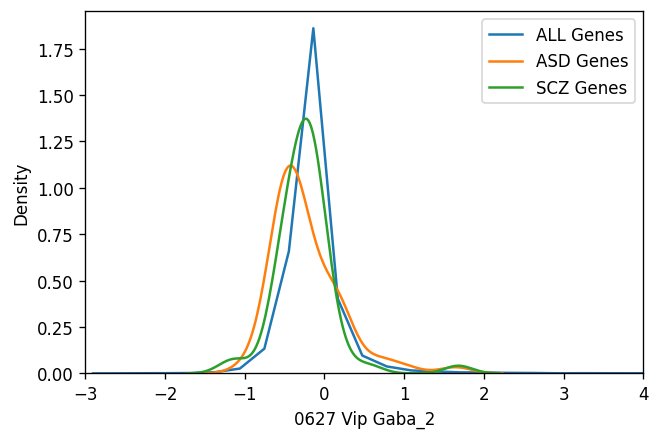

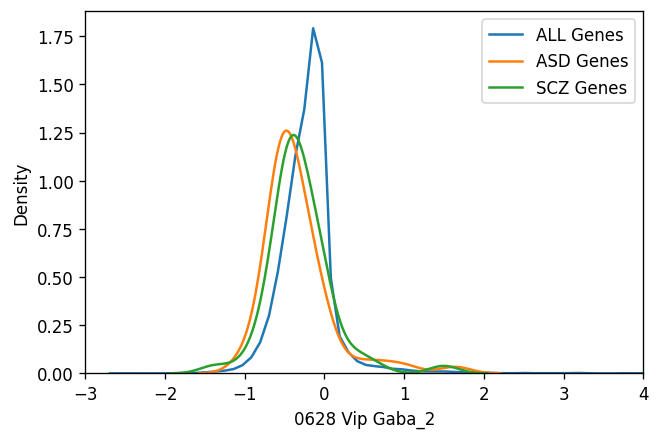

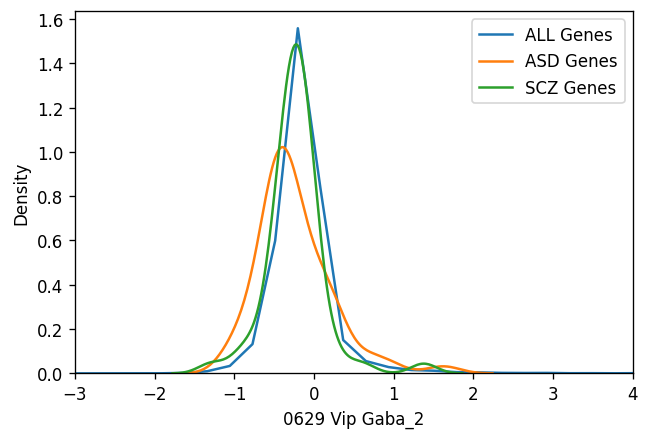

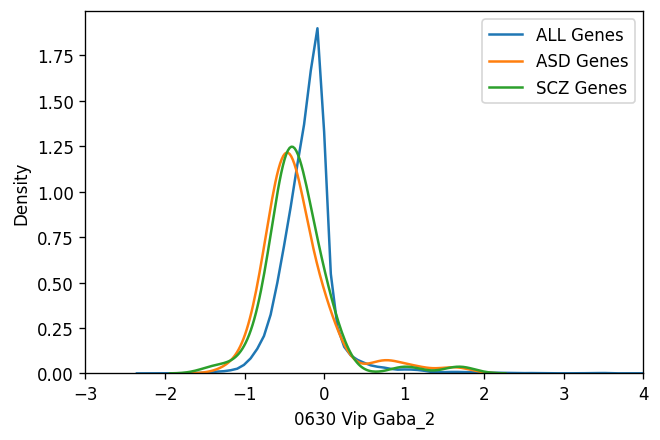

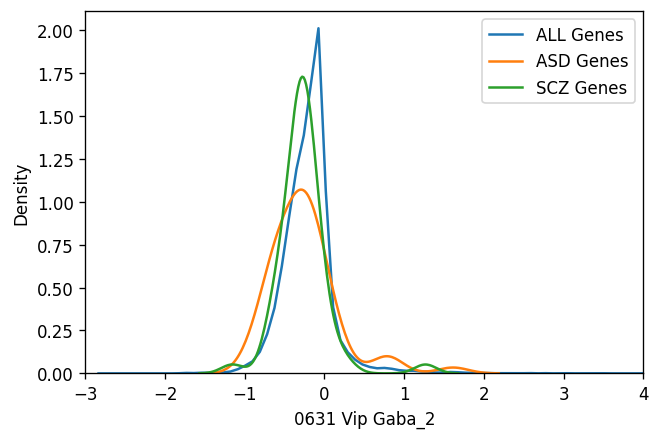

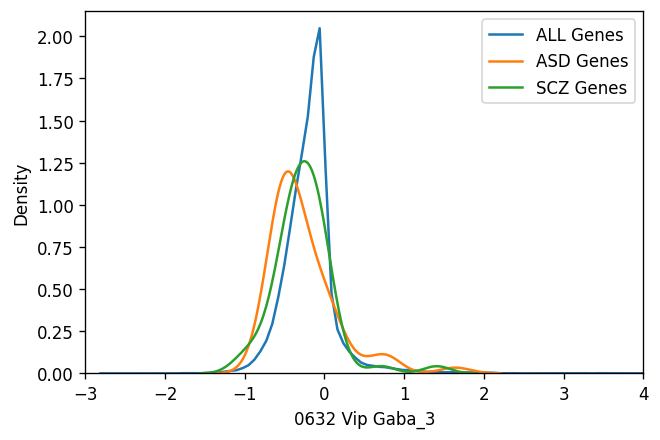

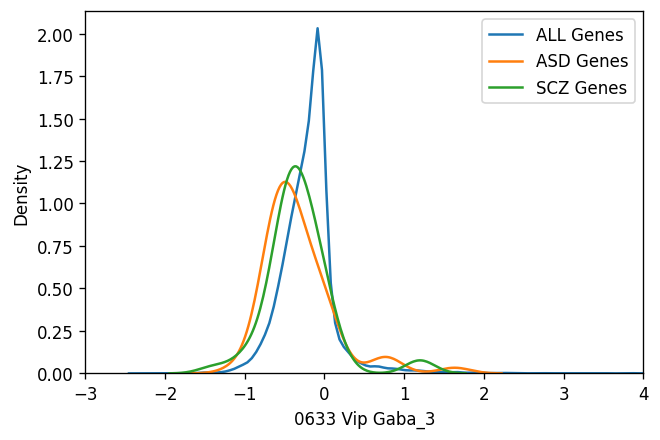

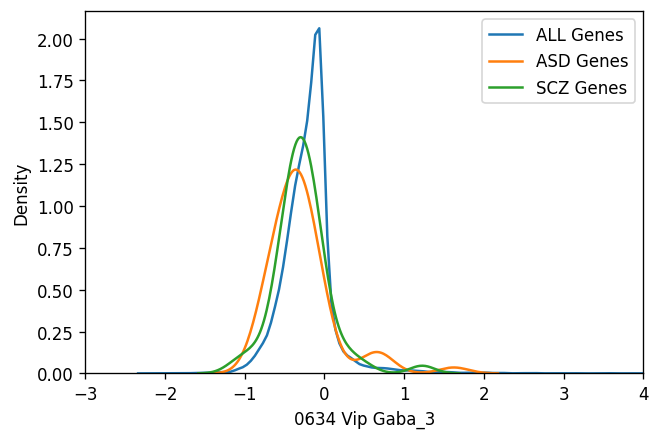

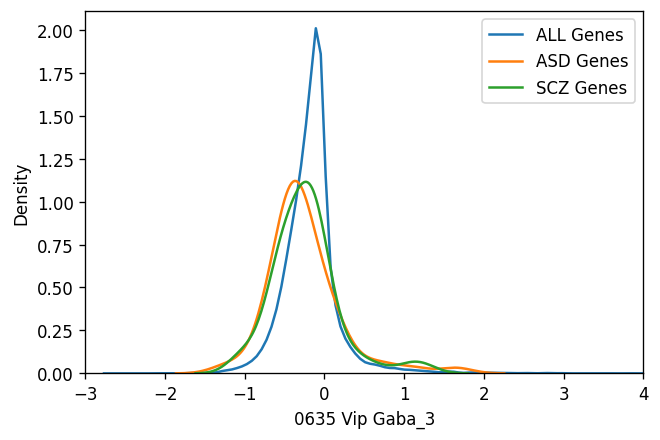

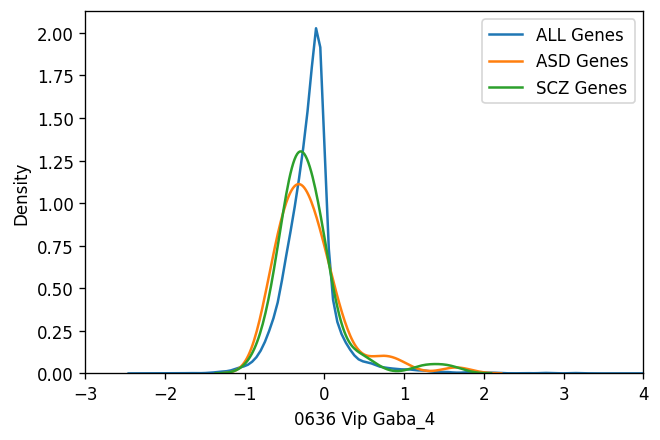

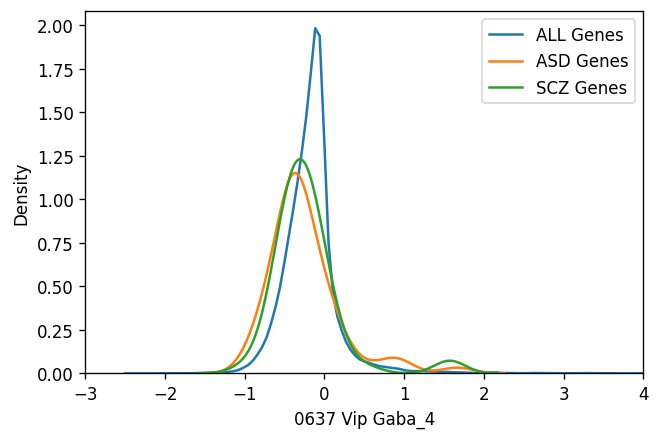

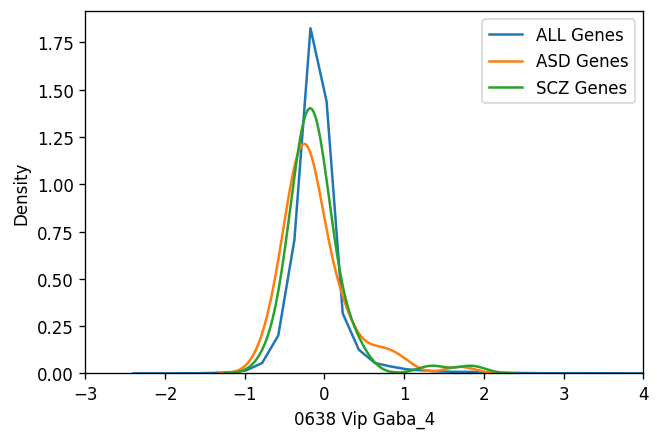

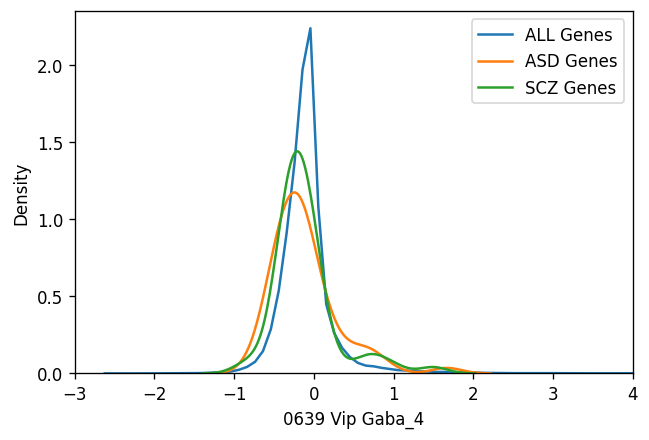

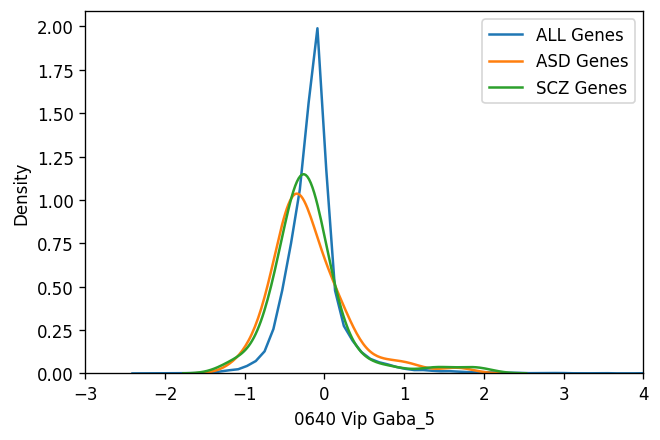

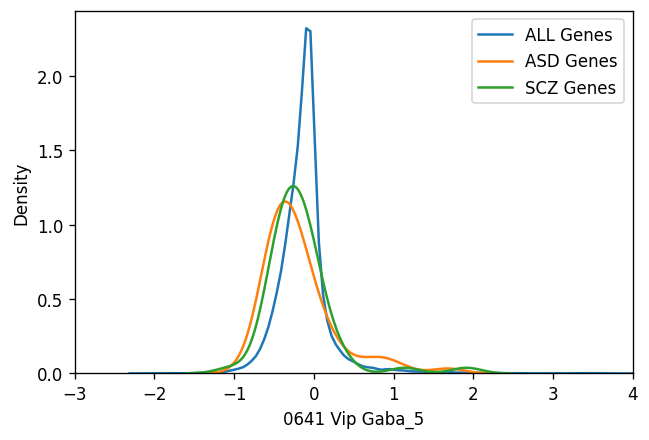

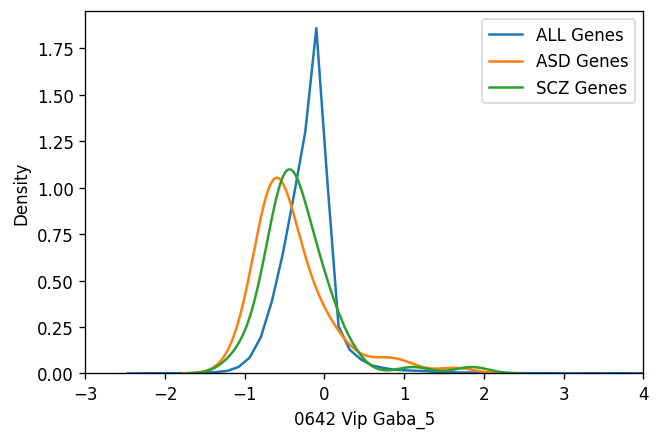

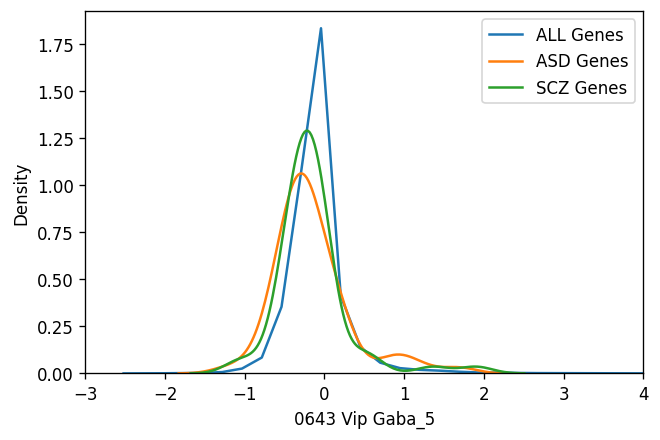

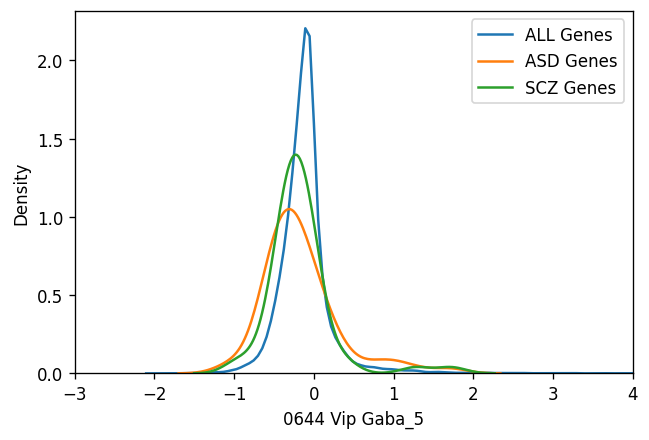

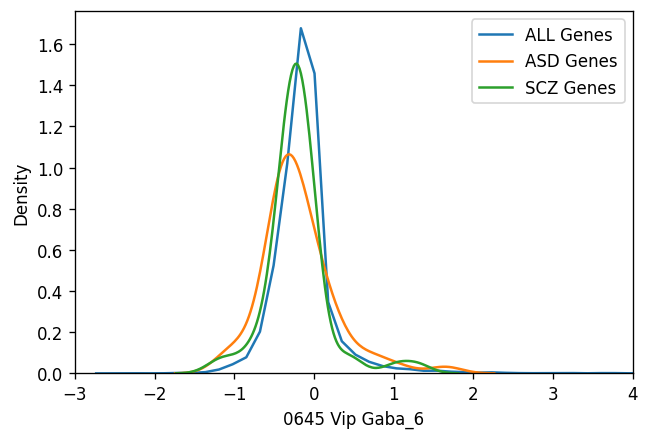

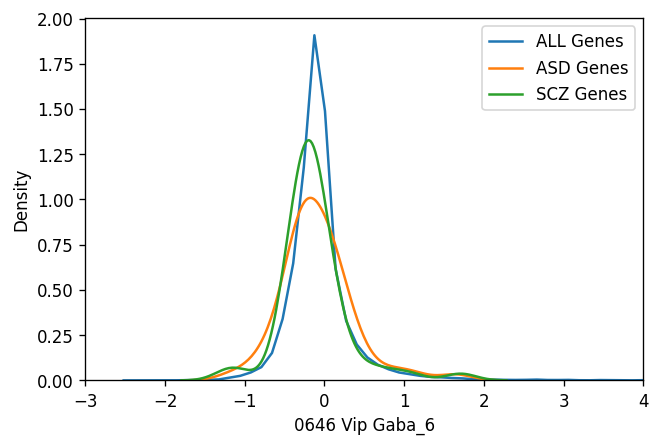

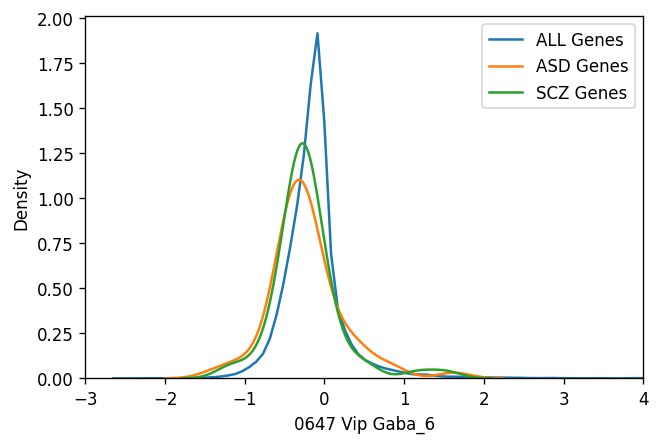

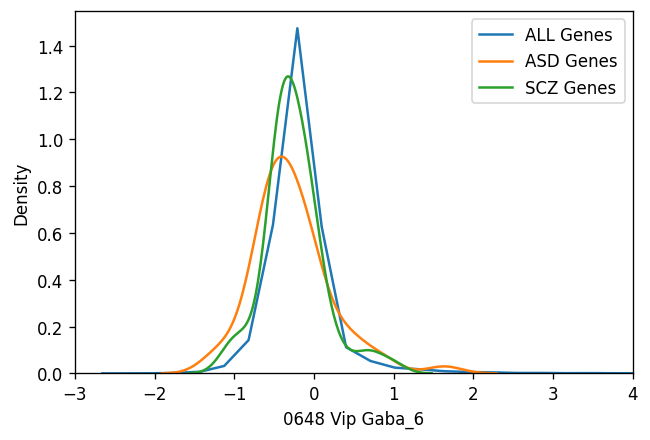

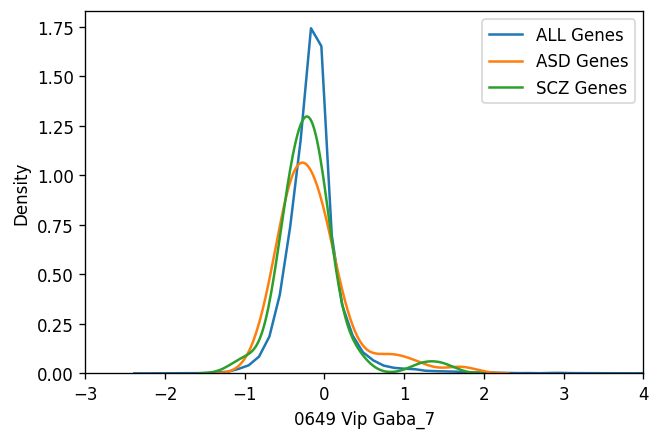

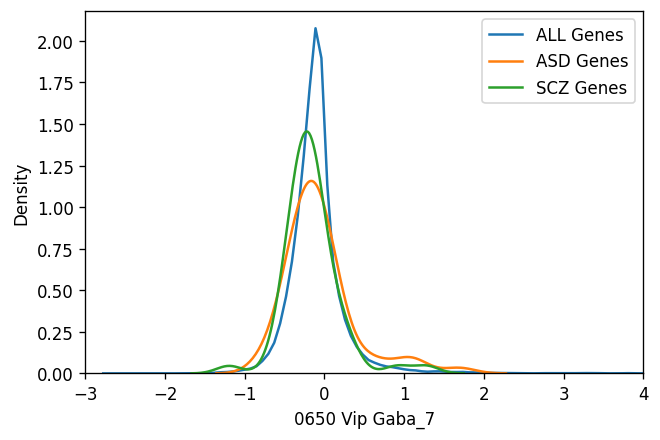

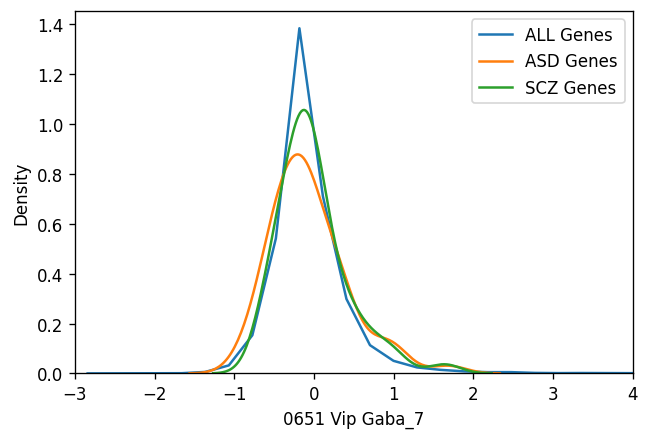

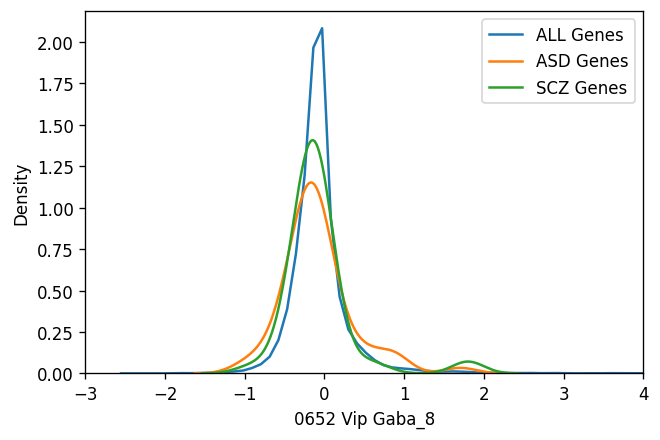

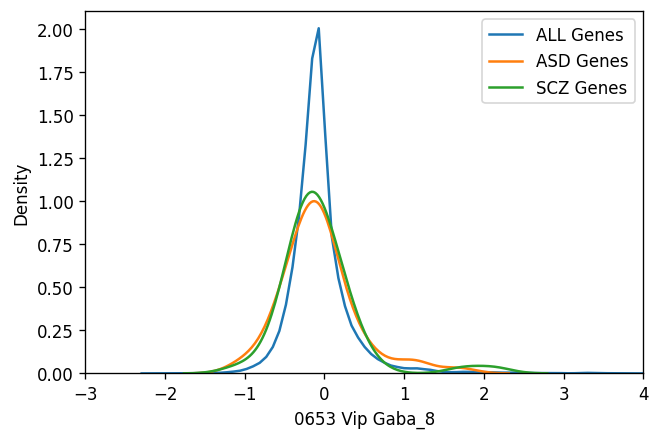

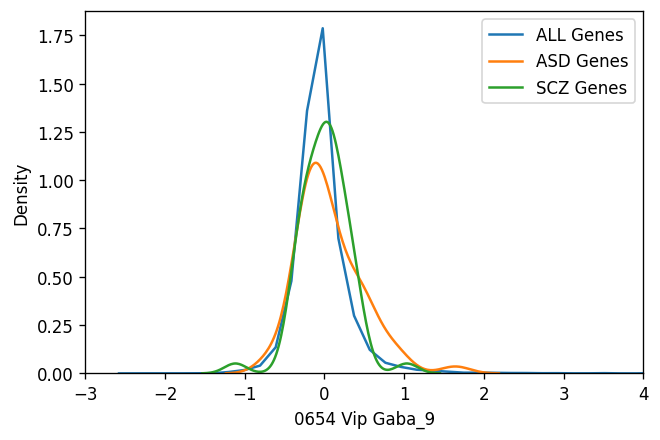

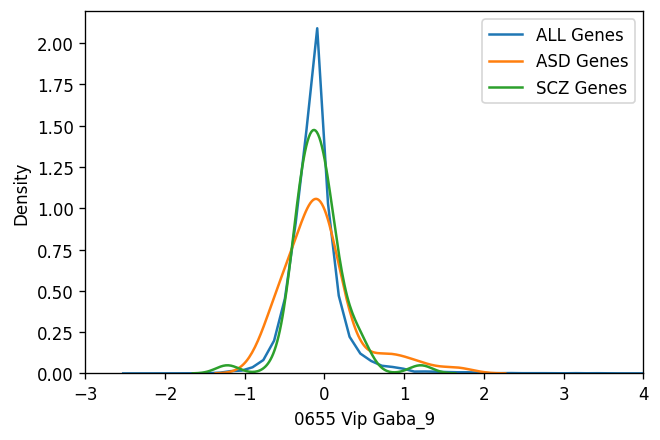

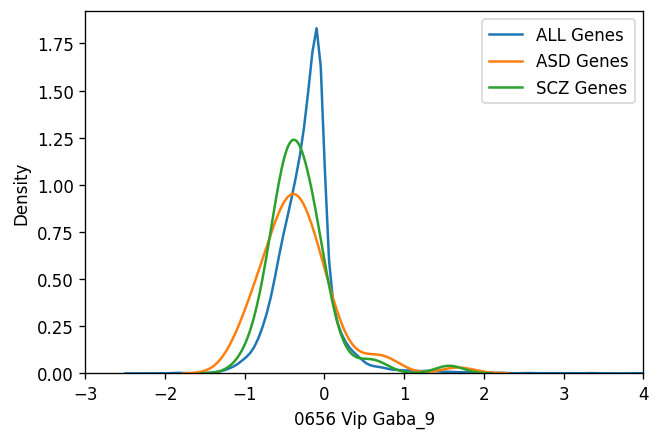

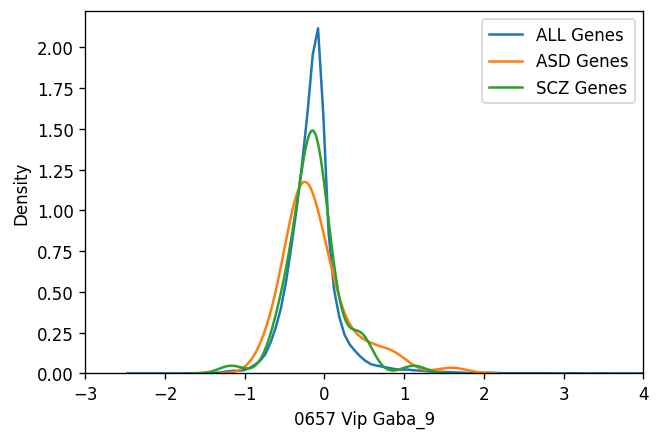

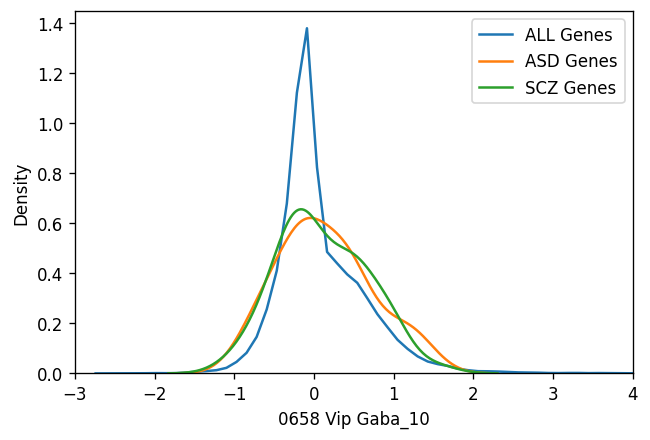

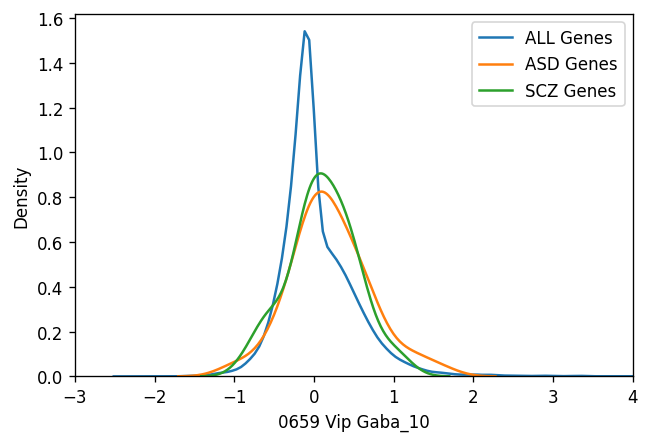

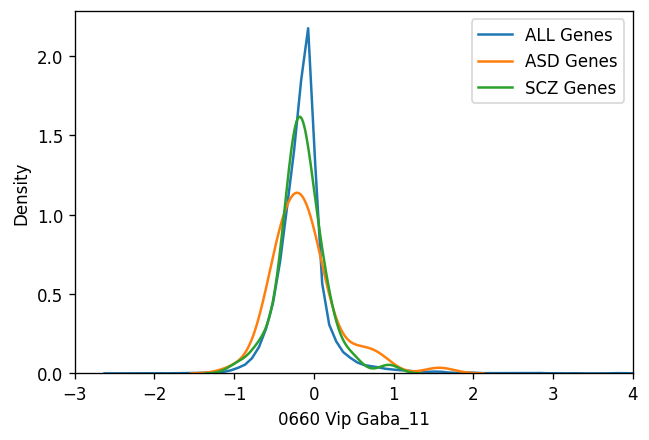

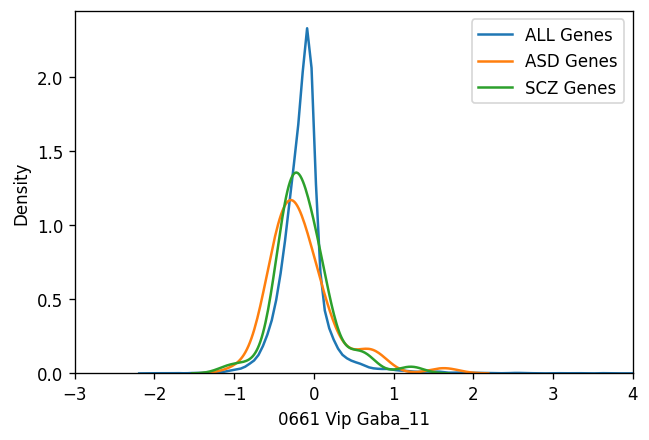

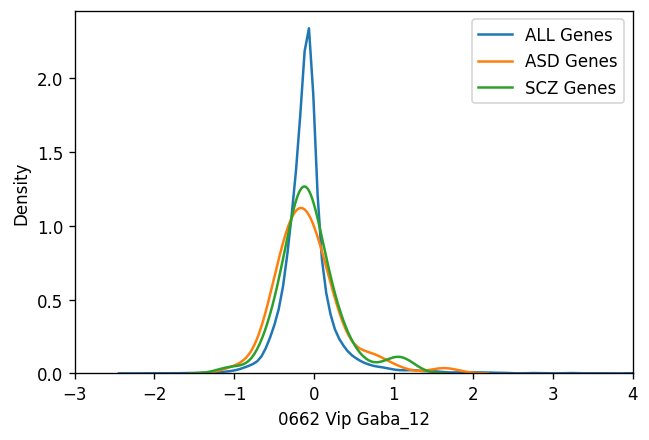

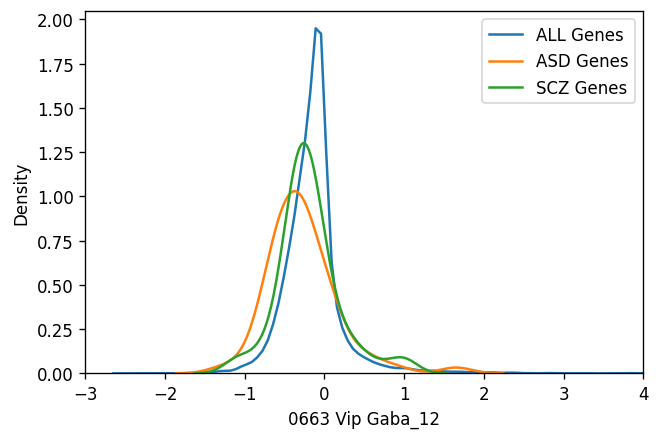

In [71]:
TestCellTypes = DF_TestCellTypes.index.values

for CT in TestCellTypes:
    plt.figure(dpi=120)

    sns.kdeplot(Mouse_V2_Cluster_Z1.loc[:, CT], label="ALL Genes")
    sns.kdeplot(Mouse_V2_Cluster_Z1.loc[ASD_Genes, CT], label="ASD Genes")
    sns.kdeplot(Mouse_V2_Cluster_Z1.loc[SCZ_Genes, CT], label="SCZ Genes")
    plt.xlim(-3, 4)
    plt.legend()

In [73]:
DF_TestCellTypes = MouseSC_Cluster_Ann[MouseSC_Cluster_Ann["subclass_label"]=="Sst Gaba"]

/tmp/ipykernel_1160024/1331962761.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(dpi=120)


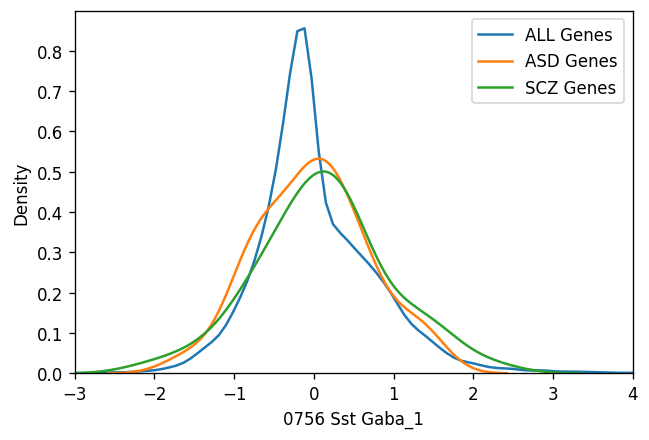

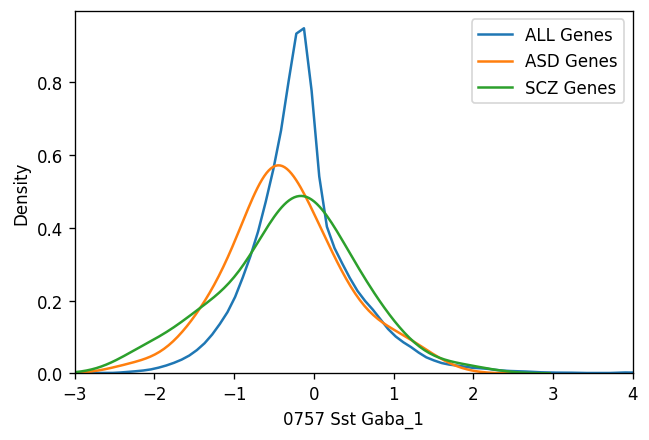

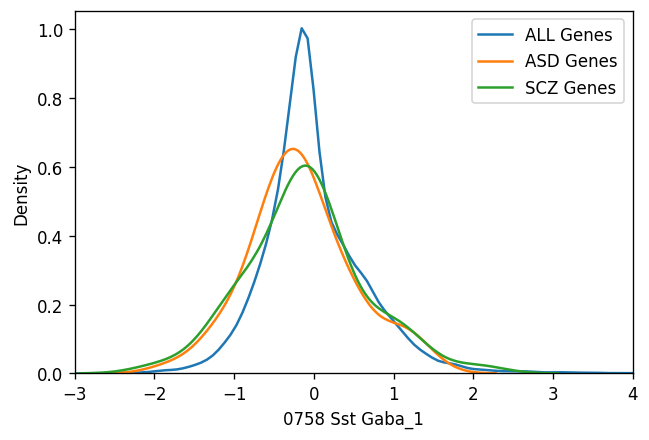

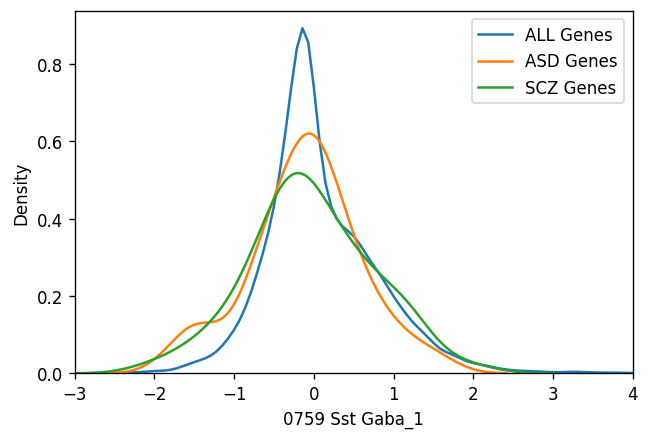

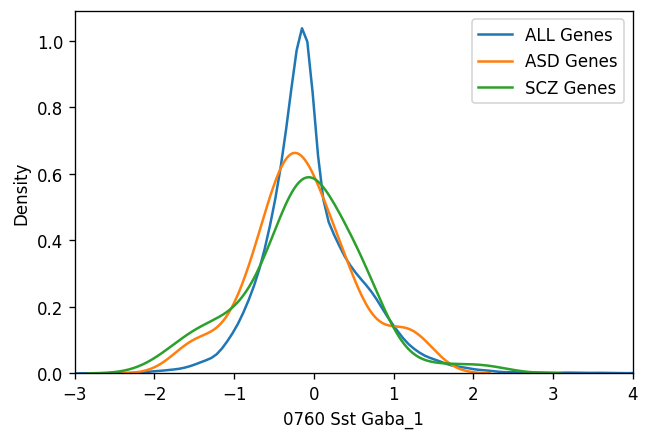

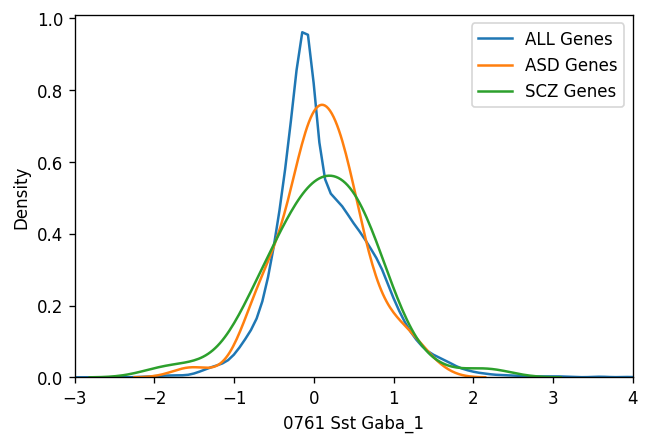

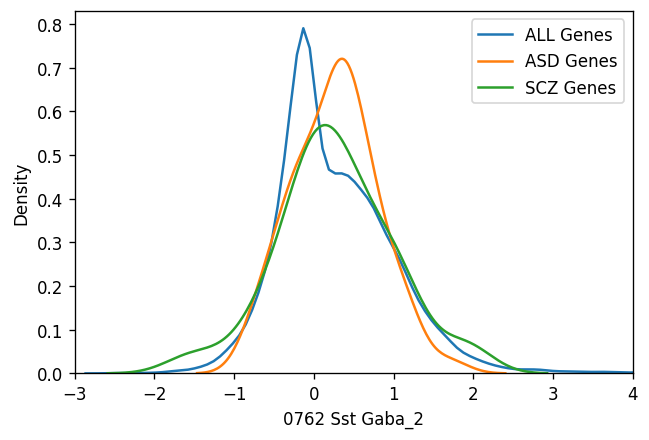

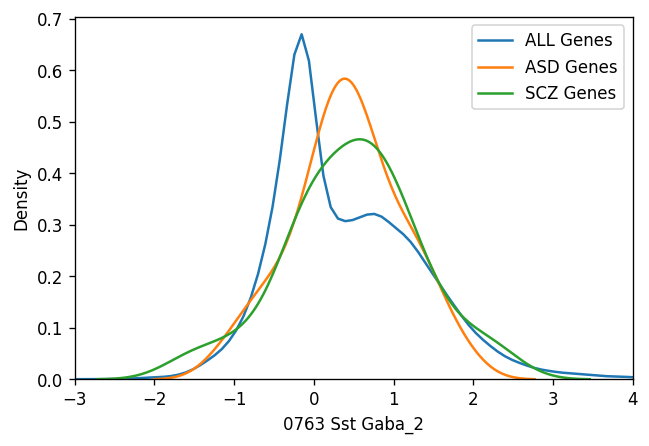

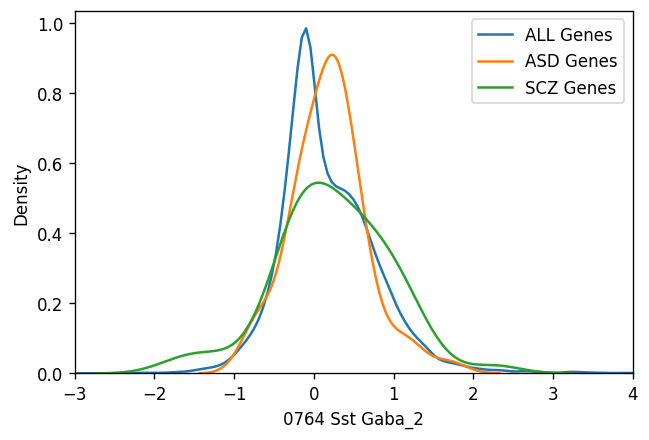

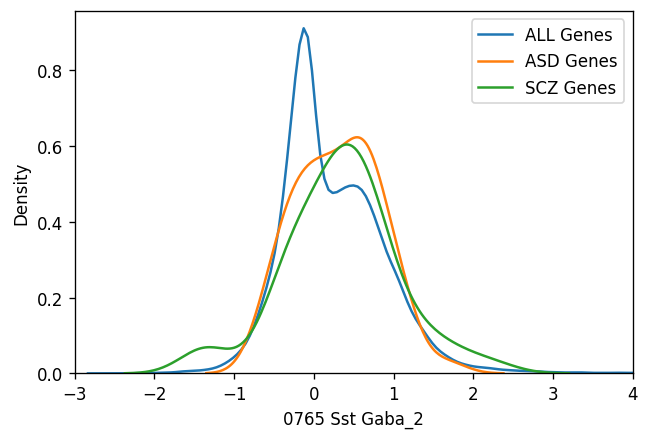

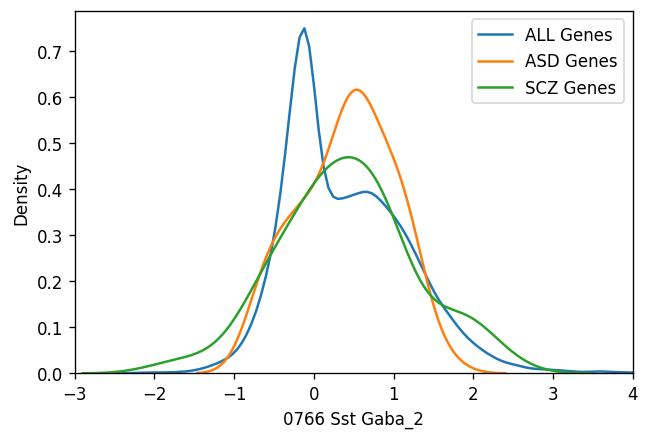

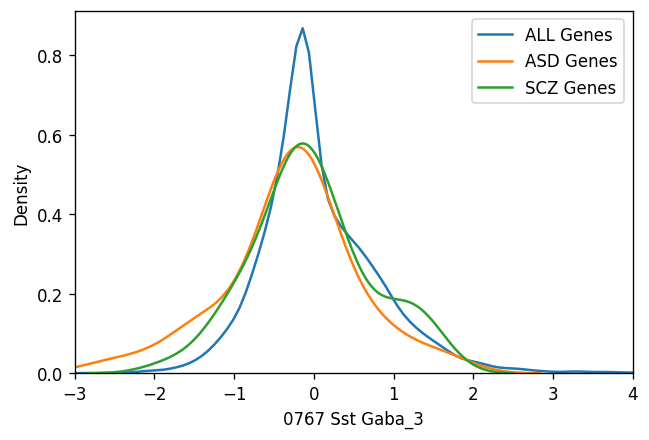

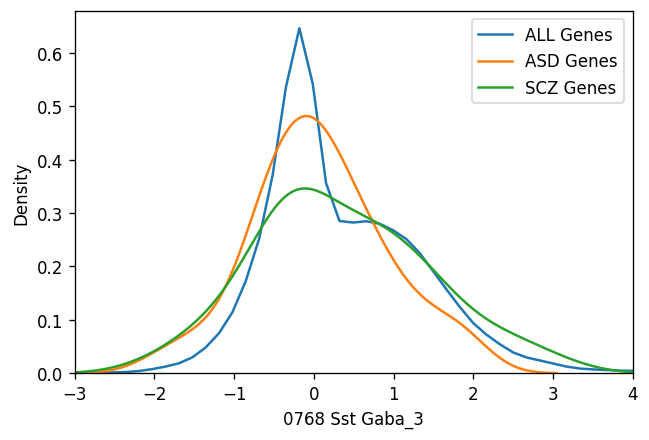

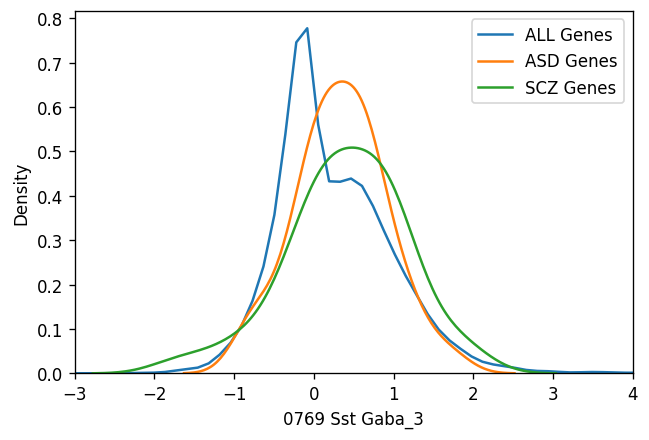

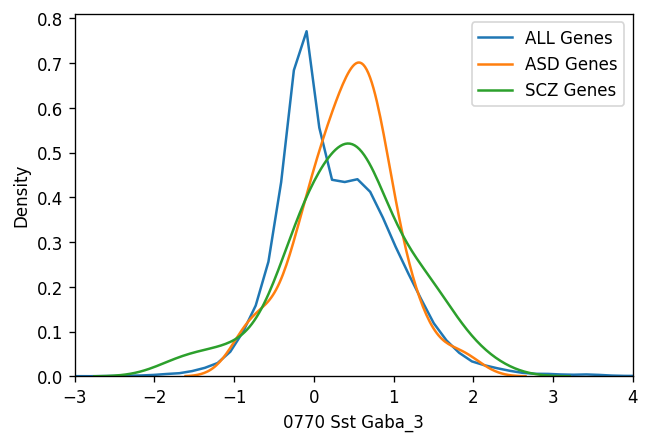

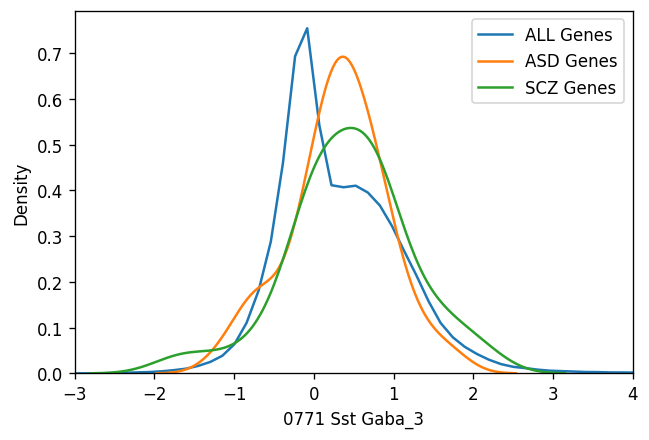

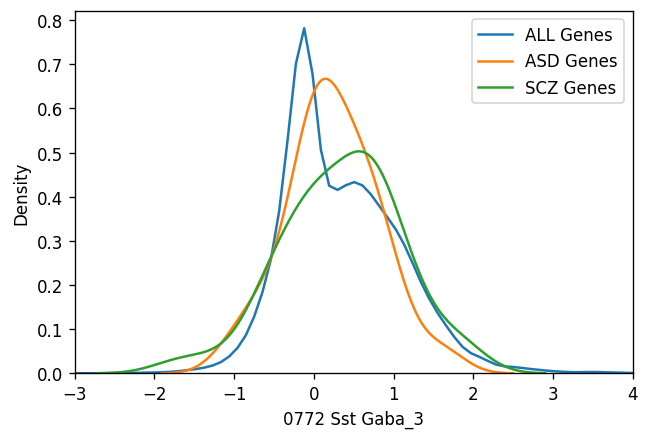

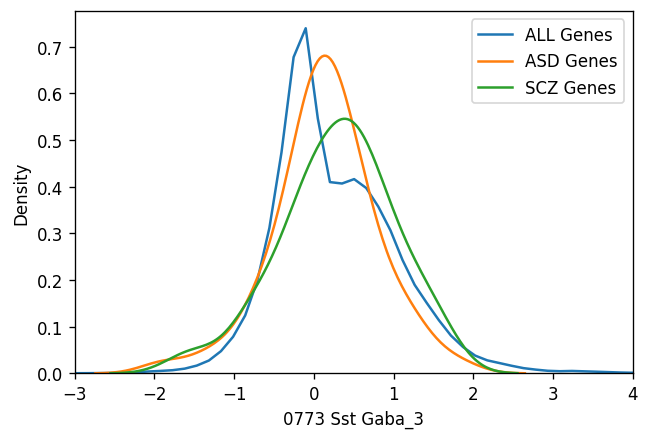

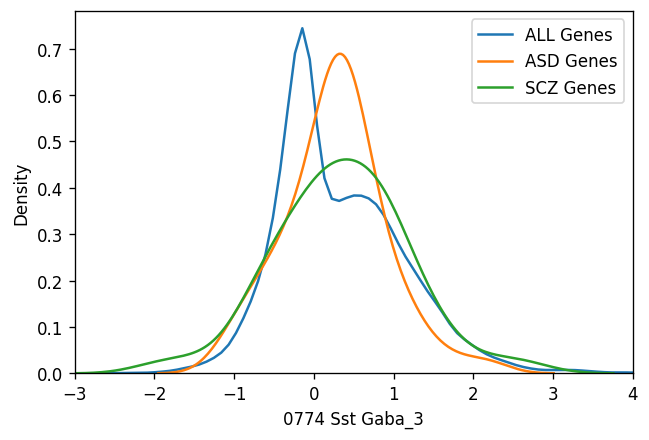

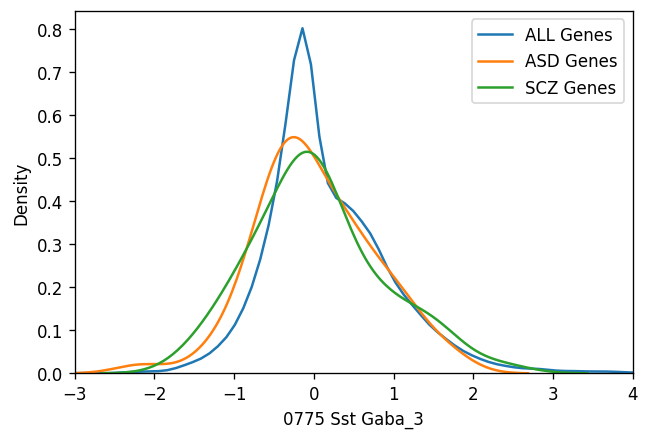

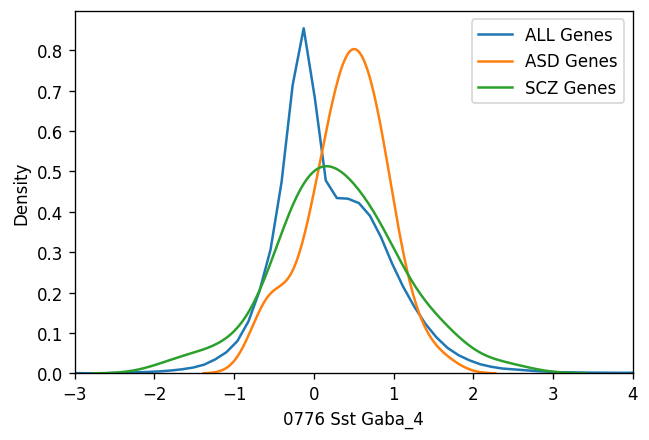

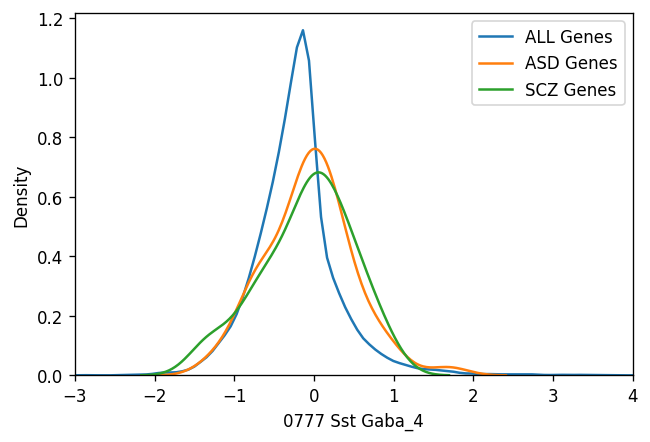

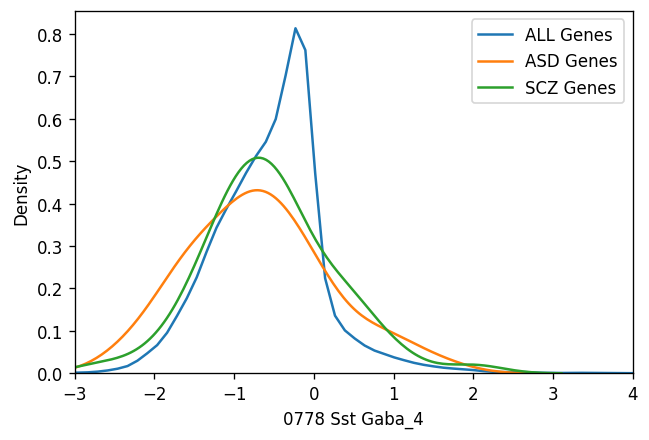

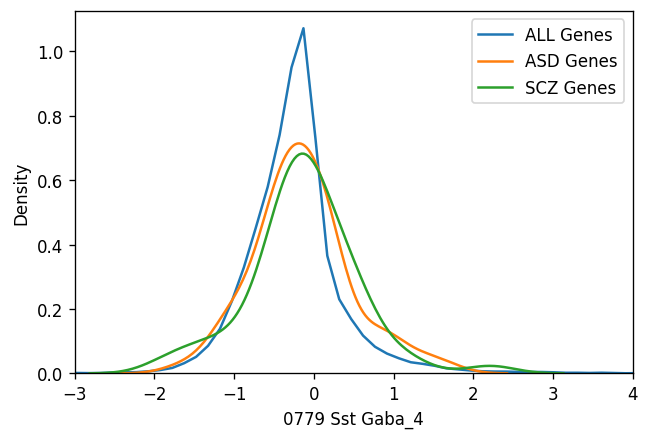

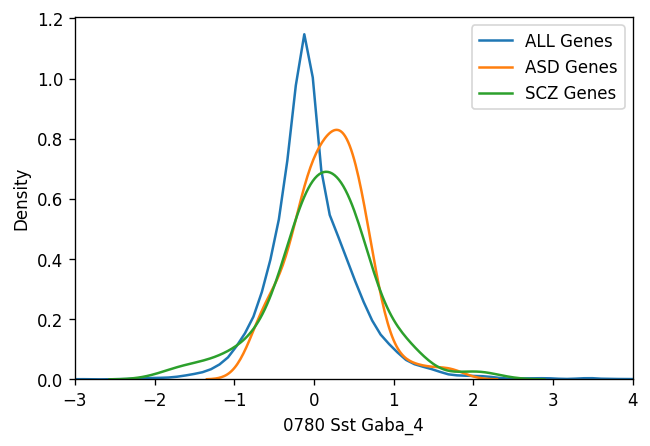

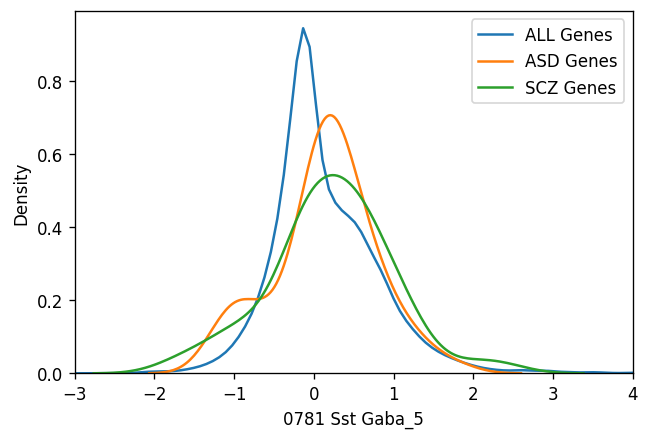

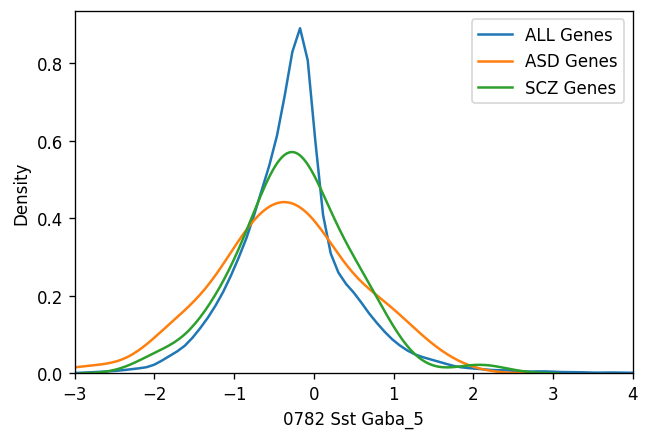

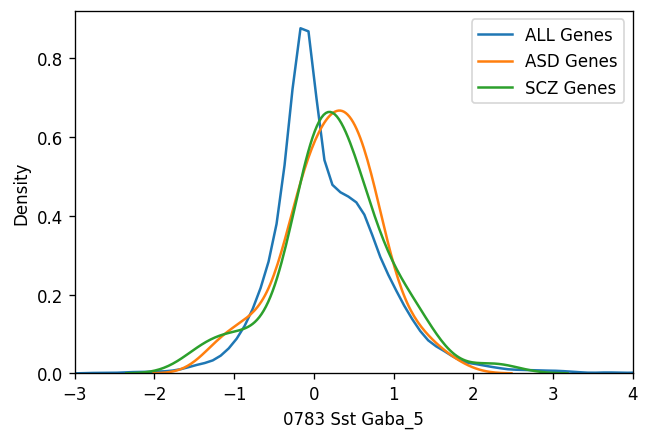

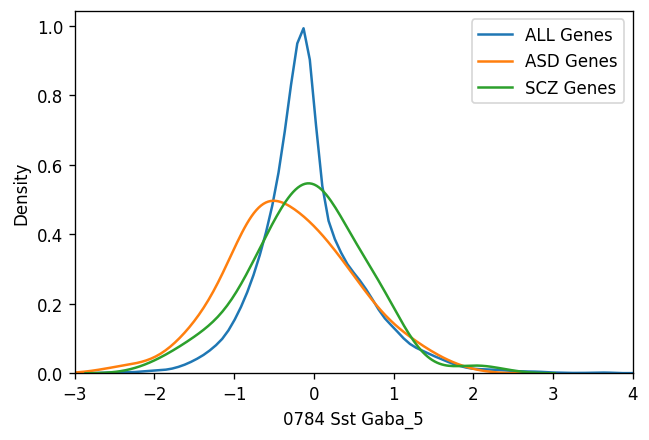

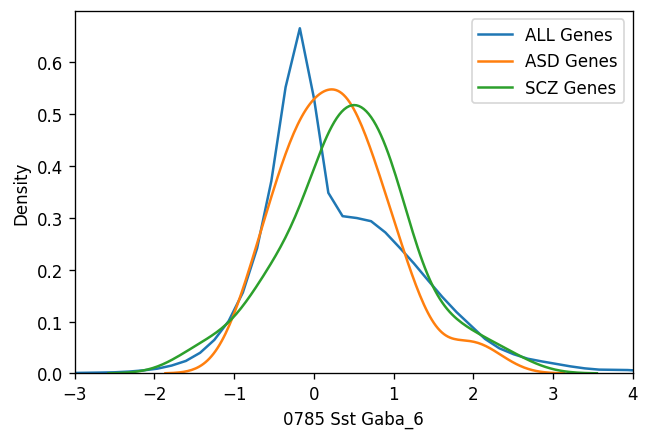

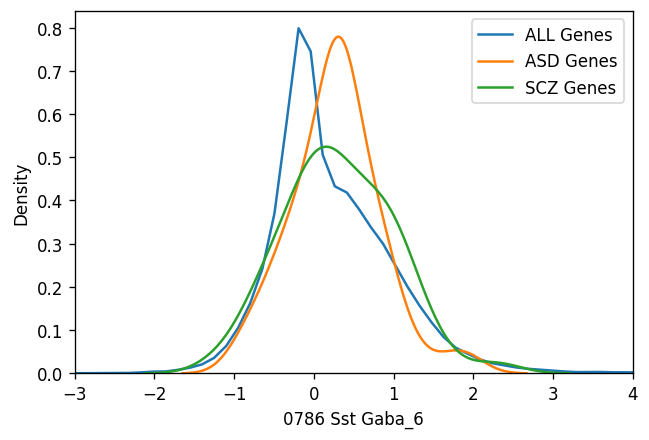

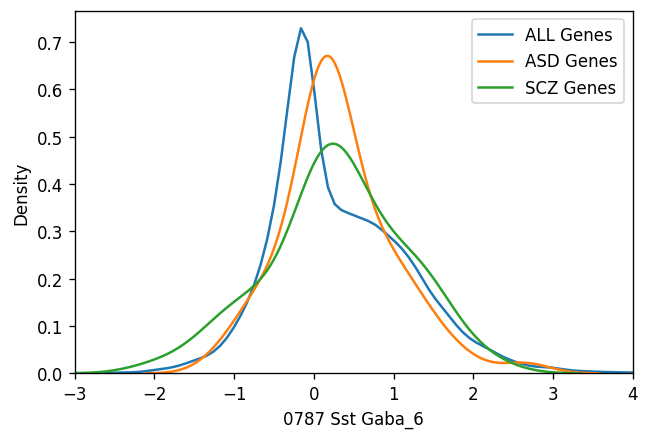

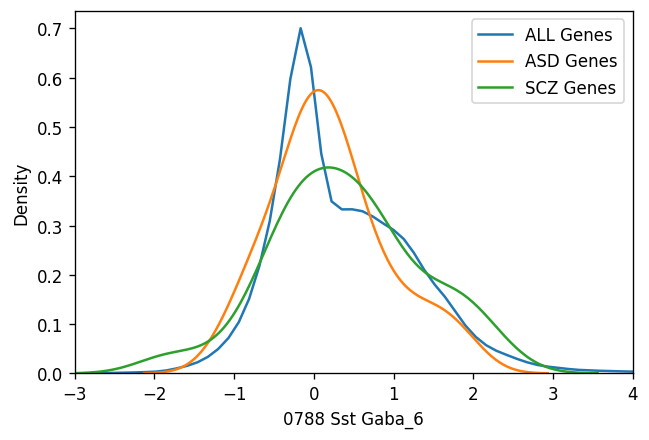

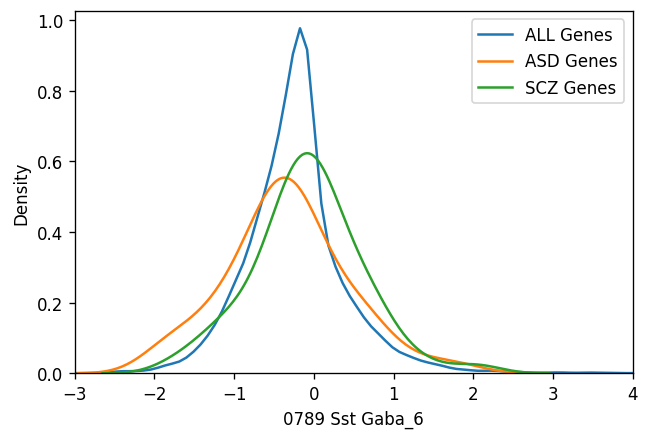

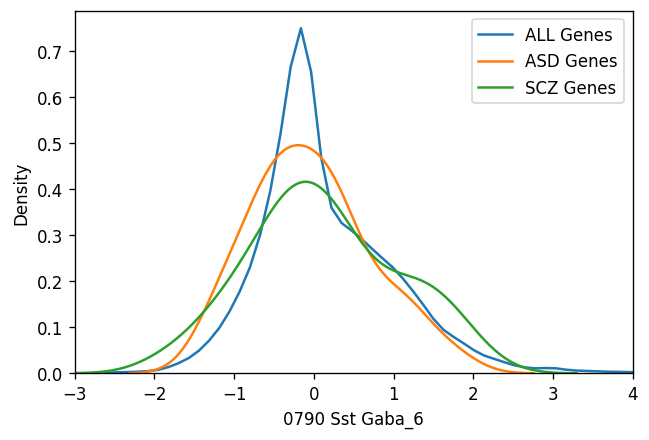

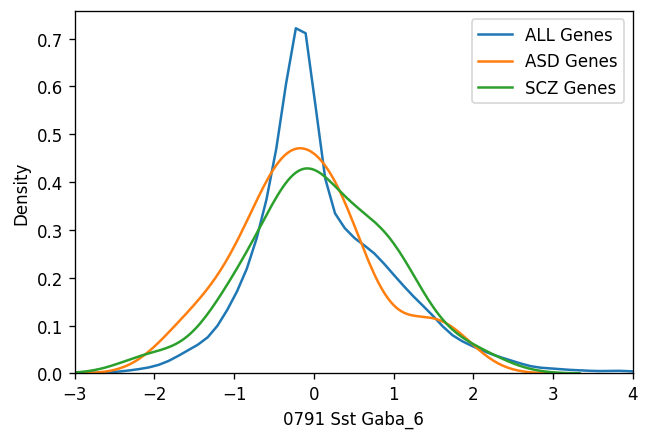

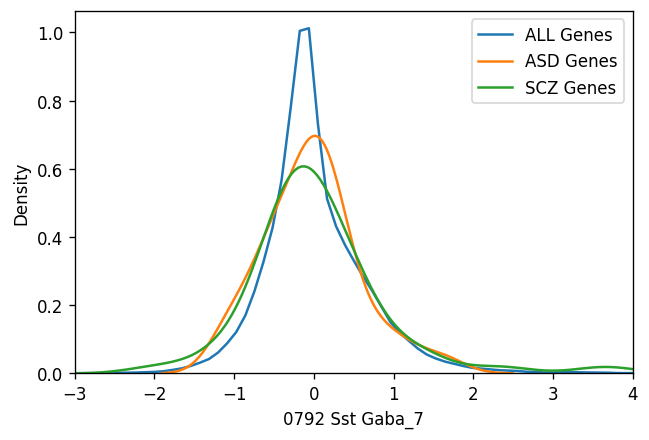

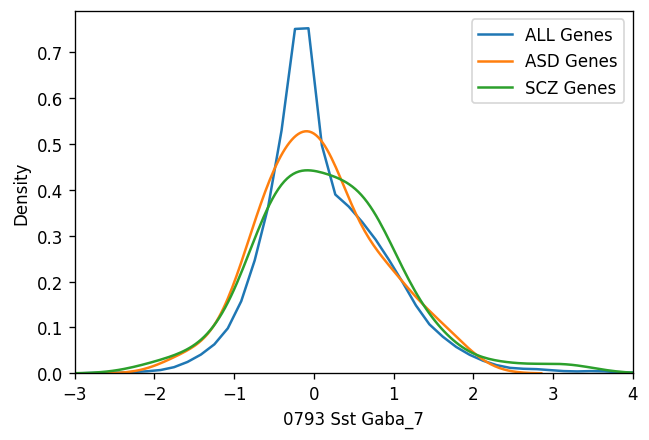

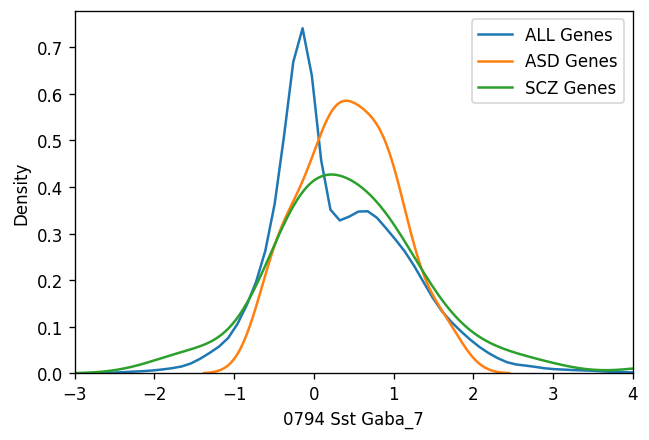

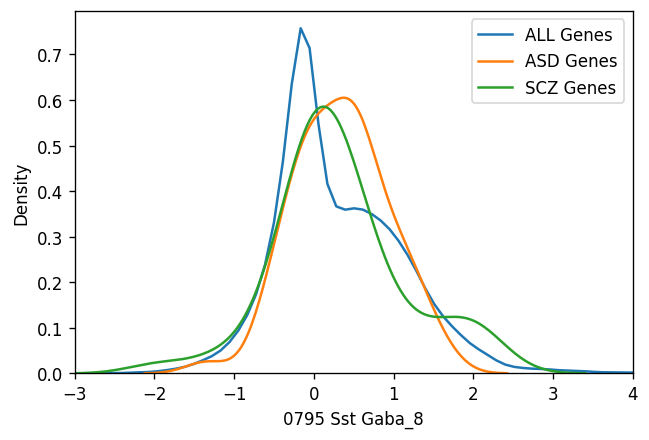

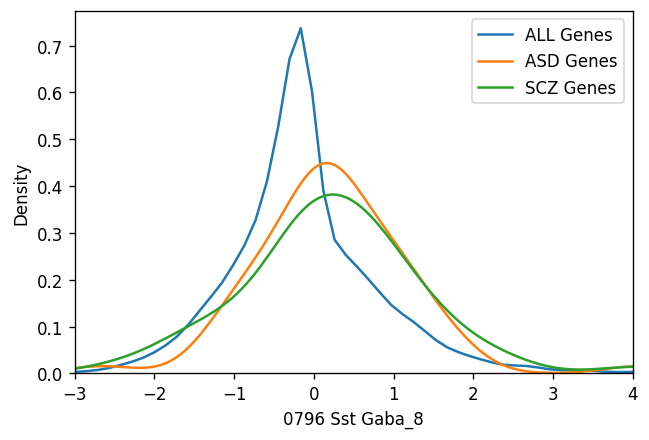

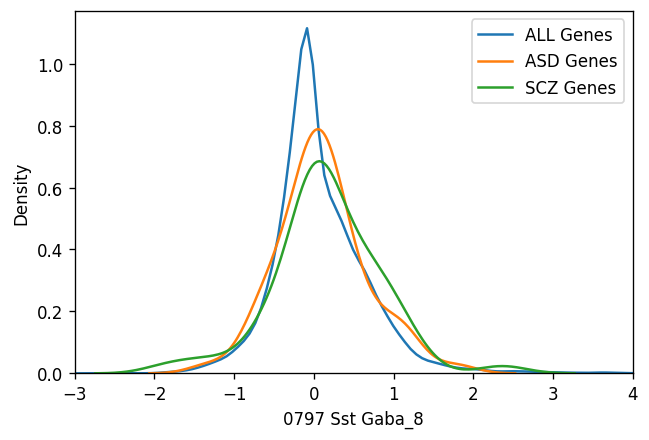

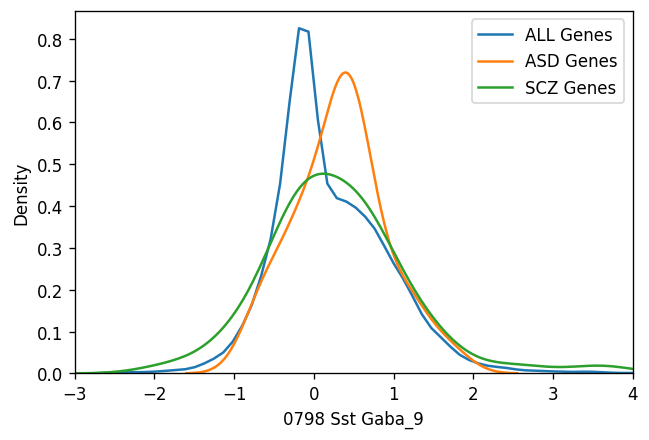

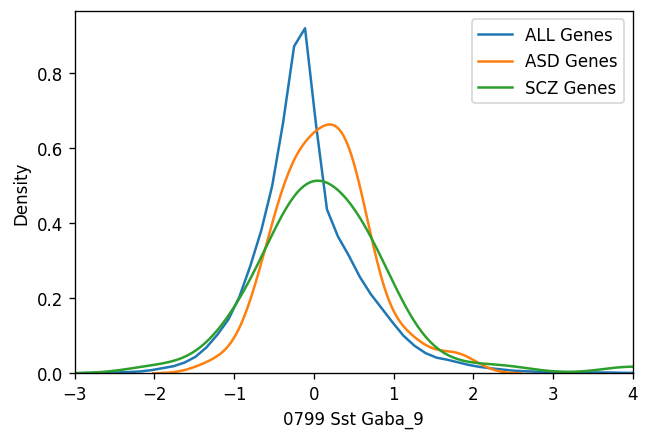

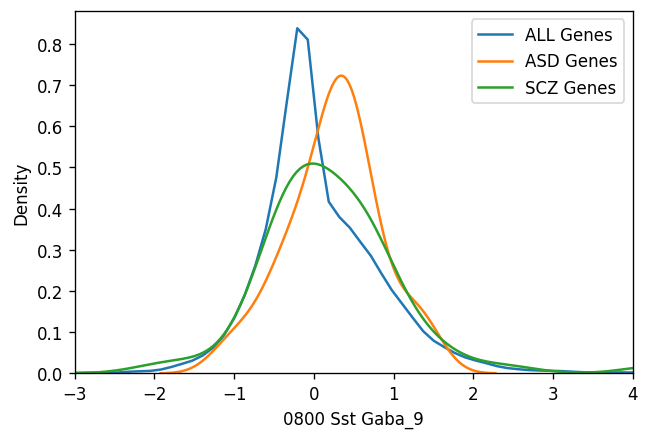

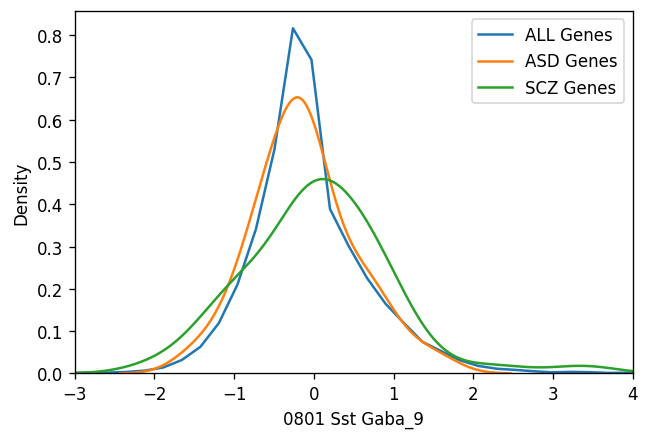

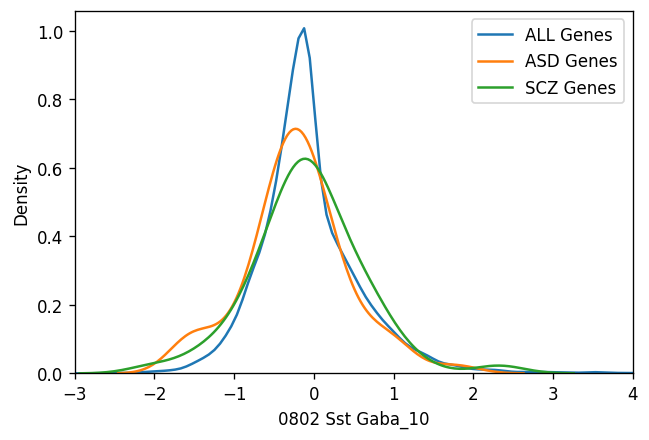

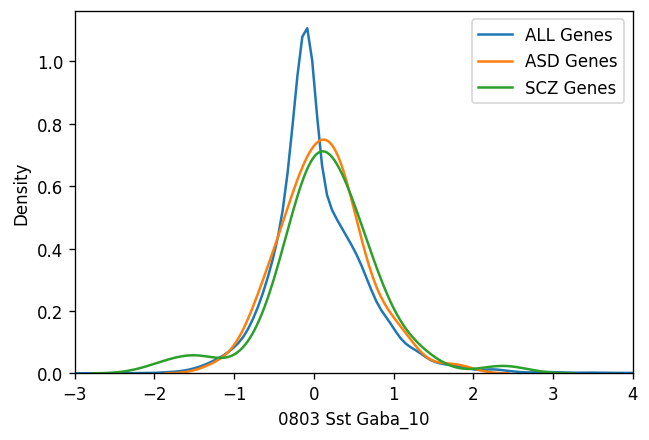

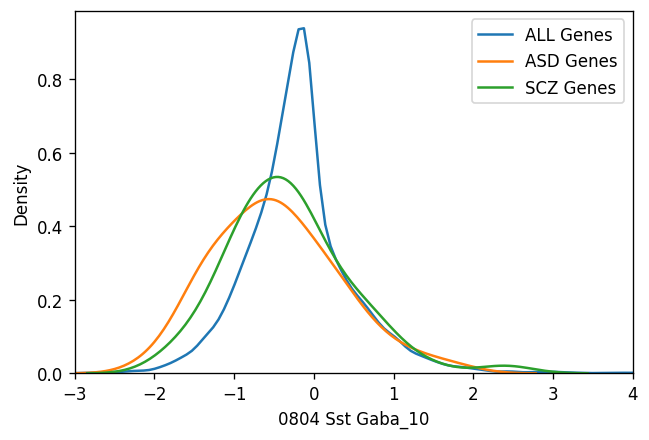

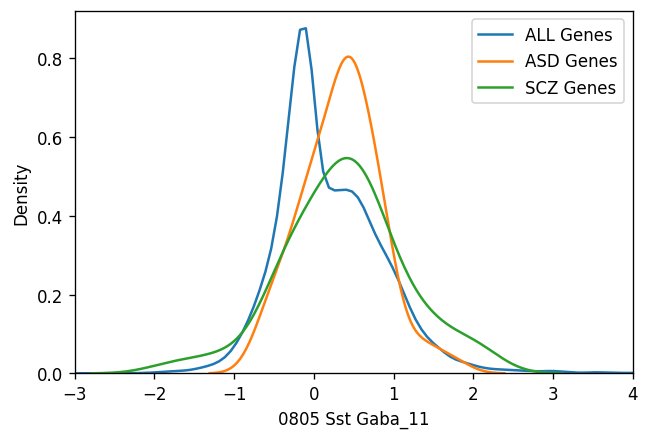

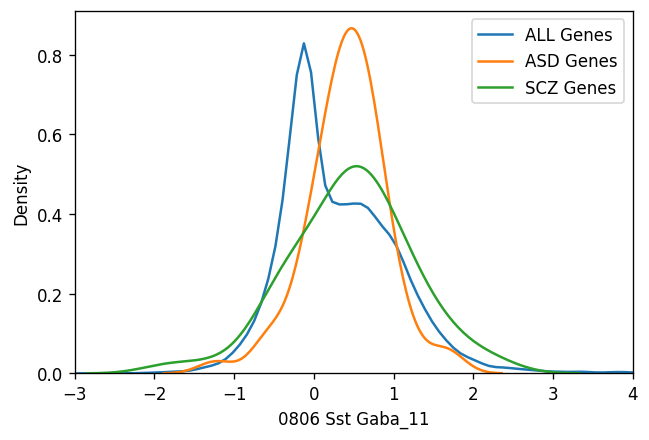

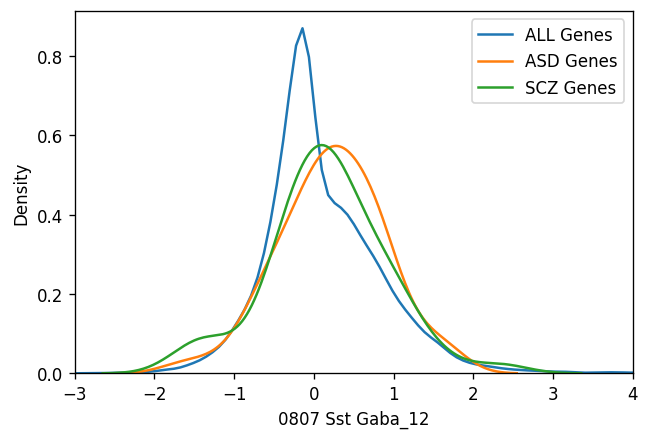

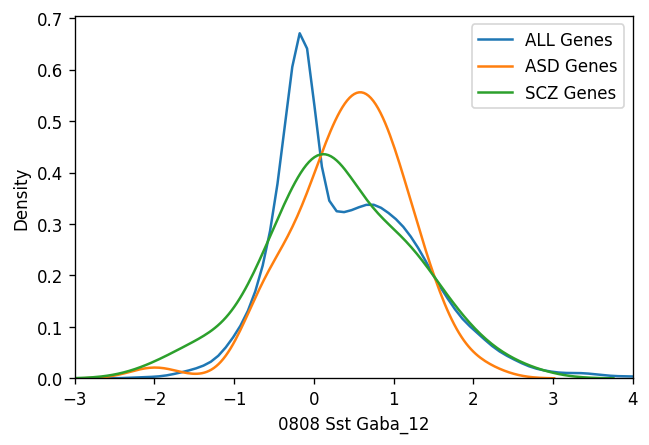

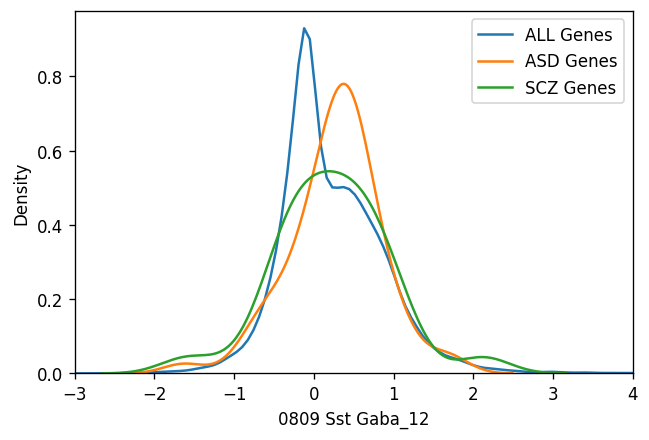

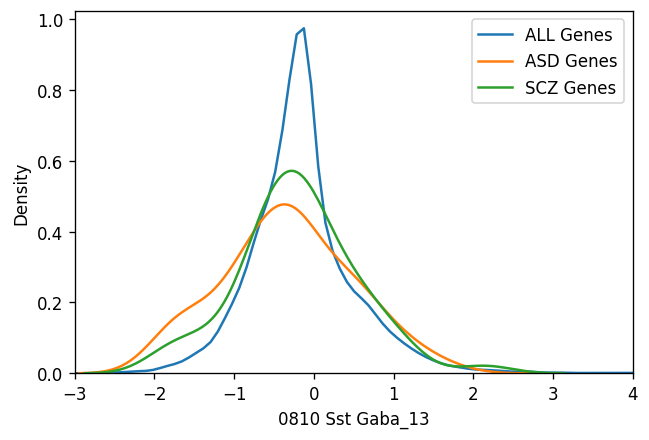

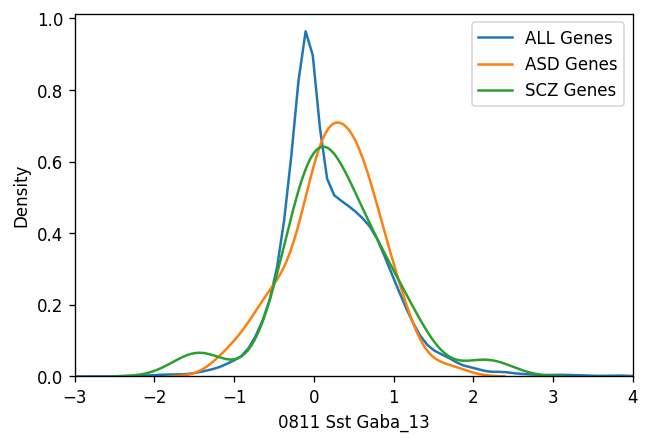

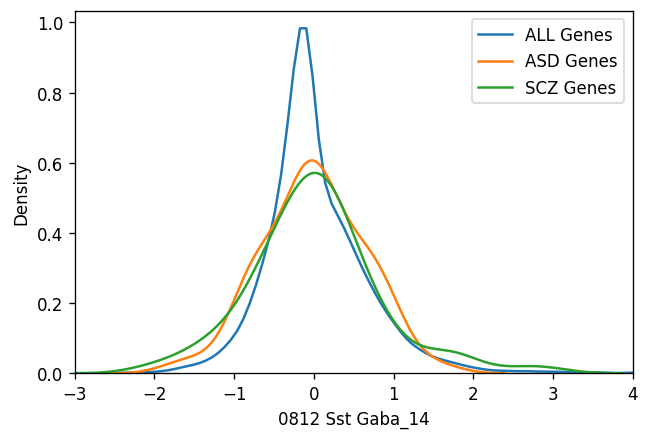

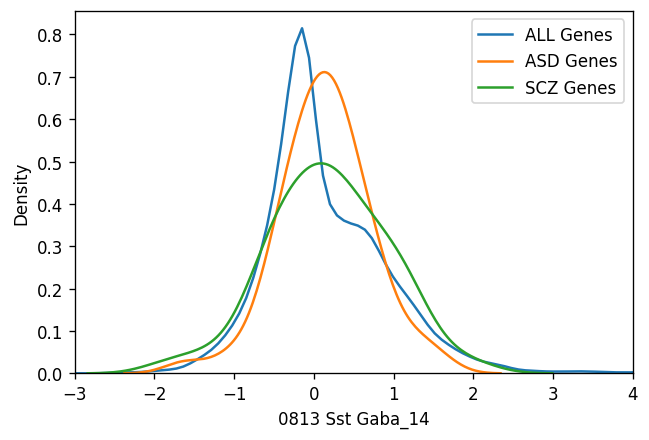

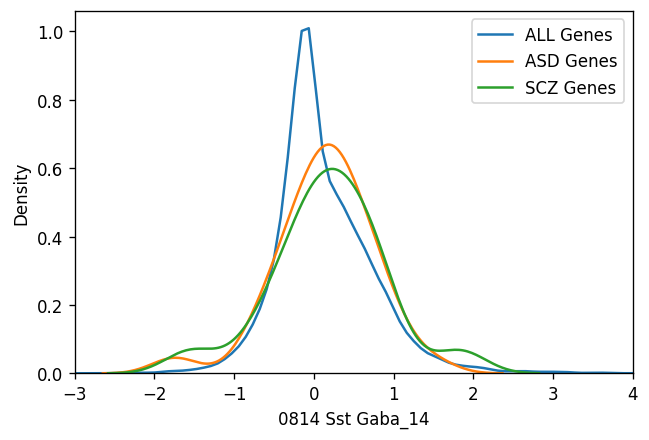

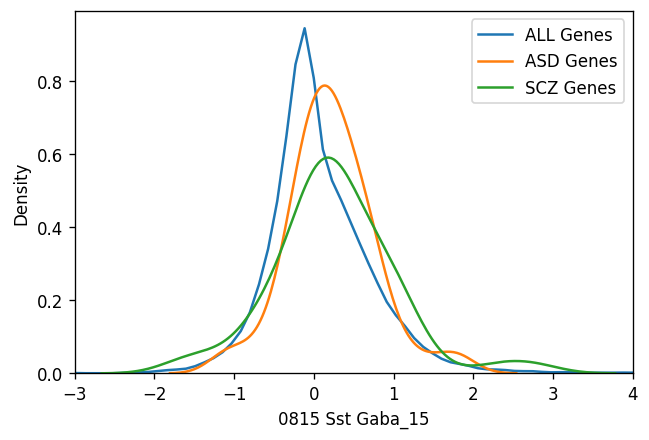

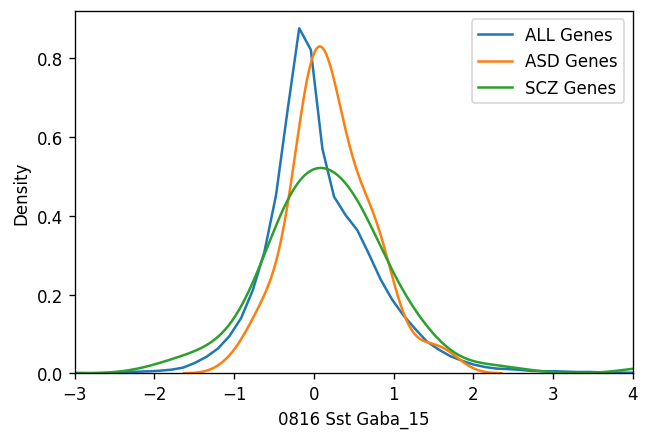

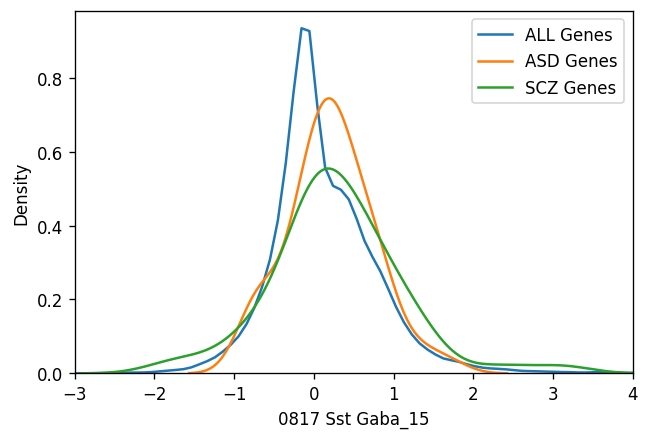

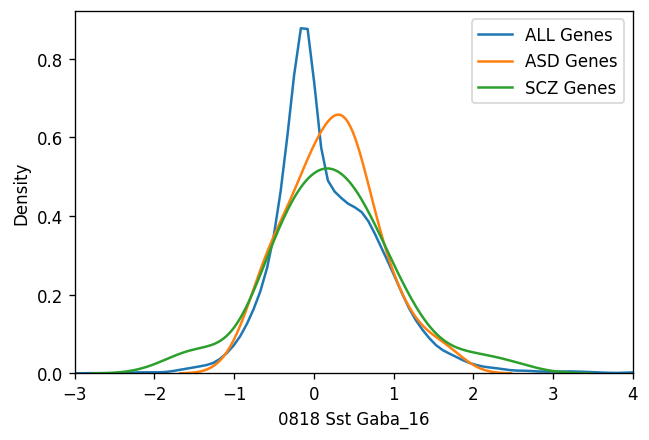

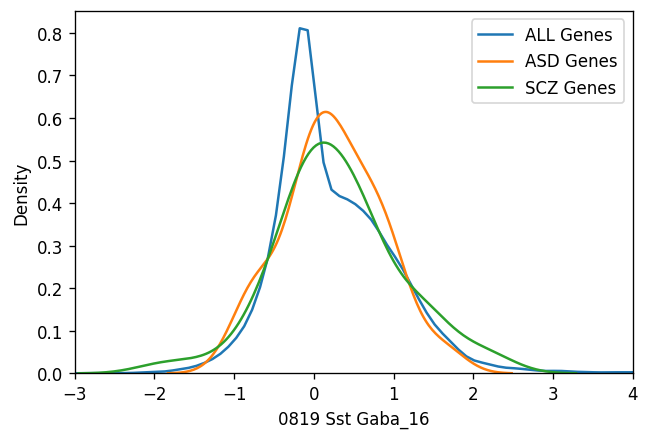

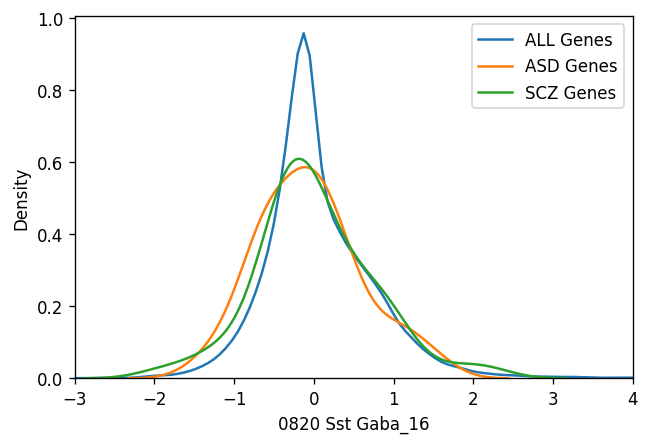

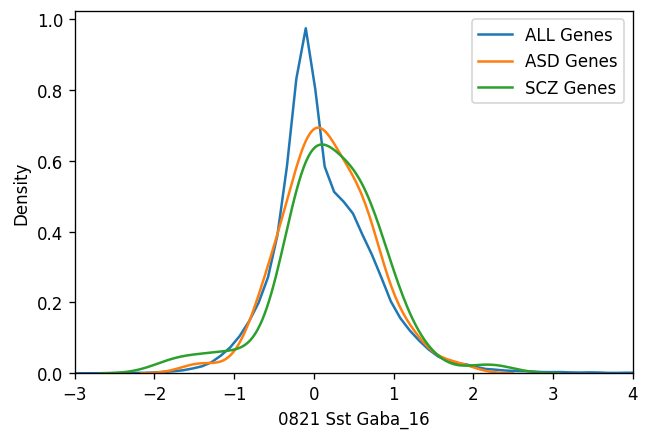

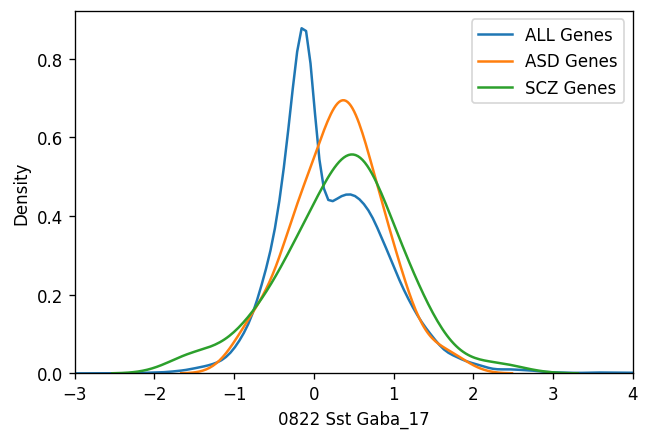

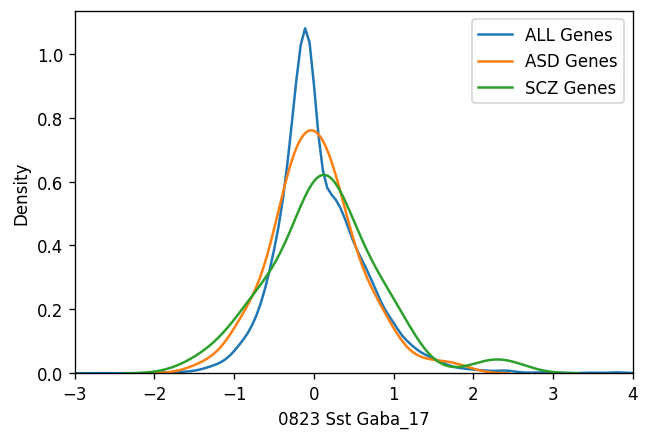

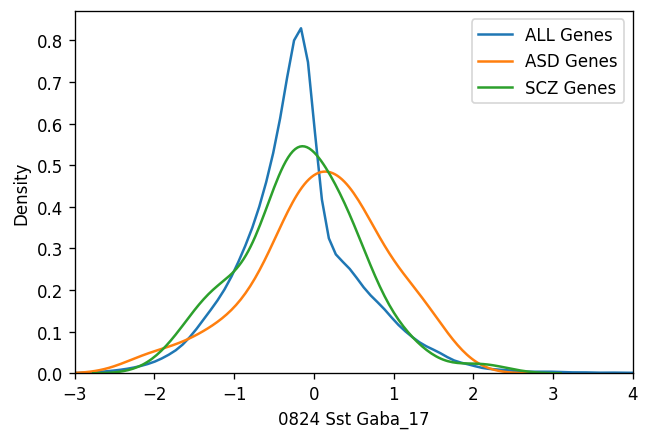

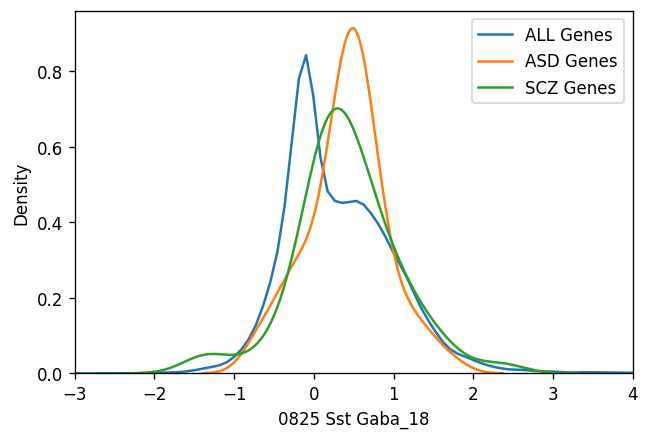

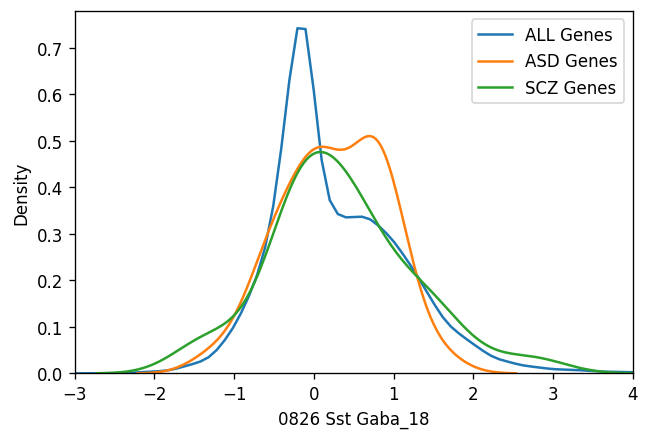

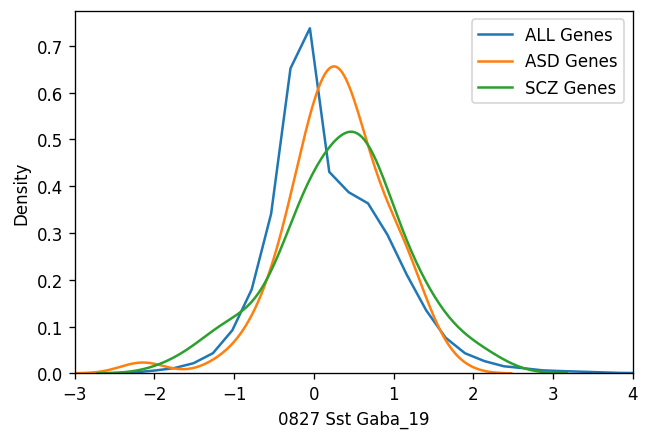

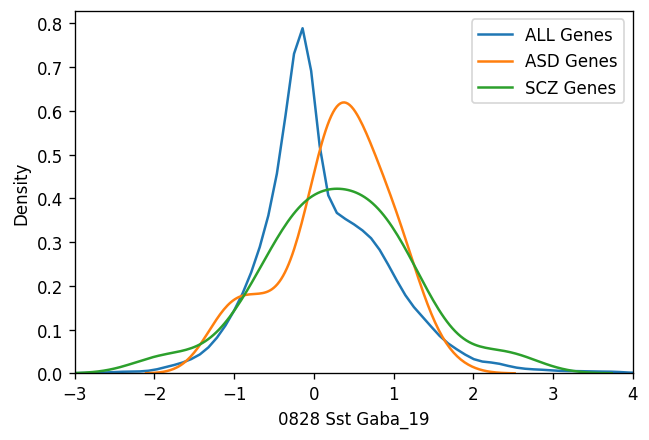

In [74]:
TestCellTypes = DF_TestCellTypes.index.values

for CT in TestCellTypes:
    plt.figure(dpi=120)

    sns.kdeplot(Mouse_V3_Cluster_Z1.loc[:, CT], label="ALL Genes")
    sns.kdeplot(Mouse_V3_Cluster_Z1.loc[ASD_Genes, CT], label="ASD Genes")
    sns.kdeplot(Mouse_V3_Cluster_Z1.loc[SCZ_Genes, CT], label="SCZ Genes")
    plt.xlim(-3, 4)
    plt.legend()